In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, re, joblib
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, BaggingClassifier

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from scipy.stats import probplot
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv("/kaggle/input/credit-score-classification/train.csv" , sep = "," , encoding = 'utf-8',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 100000
Number of columns: 28


In [ ]:
has_duplicates = data.duplicated().any()
print("Data has duplicate lines:", has_duplicates)

Data has duplicate lines: False


In [ ]:
data_types = data.dtypes
data_types

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,97909.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,10.389025,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,6.789496,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,-6.490000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,5.320000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,9.400000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,14.870000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,36.970000,2597.000000,50.000000,82331.000000


In [ ]:
data.Month = pd.to_datetime(data.Month,format="%B").dt.month
data.Month = data.Month.astype(np.int64)

In [ ]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
data.describe(include='object')

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,90015,100000,94428,92938,100000,100000,88592,92998,79805,100000,90970,100000,95521,92400,98800,100000
unique,100000,12500,10139,1788,12500,15,18940,434,6260,749,3,13178,404,3,91049,6,98792,3
top,0x1602,CUS_0xd40,Langep,38,078-73-5990,Lawyer,36585.12,3,Not Specified,19,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,44,2833,8,6575,16,14386,1408,5327,36479,24,446,52326,4305,25513,9,53174


# Converting to Numeric representation

In [ ]:
features_to_be_num=['Age','Num_of_Loan']
for feature in features_to_be_num:
    data[feature] = data[feature].str.extract('(\d+)').astype(int)

data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
features_to_be_num=['Outstanding_Debt','Annual_Income','Amount_invested_monthly','Monthly_Balance']
for feature in features_to_be_num:
    data[feature] = data[feature].str.extract(r'(\d+\.\d+)').astype(float)

data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [ ]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)

In [ ]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,91216.000000,97123.000000
mean,4.500000,119.509700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,10.389025,27.754251,1426.220376,32.285173,1403.118217,195.539456,402.164483
std,2.291299,684.757313,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,6.789496,193.177339,1155.129026,5.116875,8306.041270,199.564527,213.644217
min,1.000000,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,2.750000,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,72.236692,269.998334
50%,4.500000,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,128.954538,336.472111
75%,6.250000,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,236.815814,469.652004
max,8.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


# Filling The Missing Data

In [ ]:
data['Name'].value_counts()

Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64

In [ ]:
data[data['Name'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,8,NaN,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
17,0x161b,CUS_0x2dbc,2,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.860384,High_spent_Small_value_payments,998.869297,Good
22,0x1620,CUS_0x2dbc,7,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.555517,Standard
64,0x1662,CUS_0x4157,1,NaN,23,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.193516,High_spent_Small_value_payments,802.300442,Good
80,0x167a,CUS_0xa66b,1,NaN,40,221-30-8554,Teacher,33751.27,2948.605833,5,...,Standard,1328.93,37.089076,19 Years and 2 Months,NM,65.008174,117.306697,High_spent_Medium_value_payments,362.545712,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,0x25fba,CUS_0x372c,5,NaN,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.646093,Low_spent_Small_value_payments,NaN,Good
99965,0x25fbb,CUS_0x372c,6,NaN,19,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.355969,Low_spent_Large_value_payments,NaN,Good
99969,0x25fc3,CUS_0xf16,2,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.646237,High_spent_Small_value_payments,NaN,Good
99973,0x25fc7,CUS_0xf16,6,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,NaN,Low_spent_Small_value_payments,NaN,Good


In [ ]:
data[data['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,NaN,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


In [ ]:
data[data['Customer_ID']=='CUS_0xd40'][['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries']]

,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries
0,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0
1,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0
2,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0
3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0
4,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0
5,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0
6,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,11.27,4.0
7,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0


#### The only column here changed changing the Credit score from good to standard is the payment behavior. We will figure out how does it affect the credit score later.

In [ ]:
data[(data['Name'].isnull()) & (data['SSN'].isnull())]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,8,NaN,23,NaN,Scientist,19114.120,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
160,0x16f2,CUS_0x132f,1,NaN,41,NaN,Musician,19514.880,1828.240000,7,...,NaN,881.40,26.084543,19 Years and 3 Months,NM,0.000000,50.143727,High_spent_Medium_value_payments,382.680273,Standard
345,0x1807,CUS_0xc65,2,NaN,21,NaN,NaN,148699.320,12432.610000,3,...,Good,949.38,28.510775,30 Years and 8 Months,No,364.915177,237.918381,High_spent_Large_value_payments,880.427442,Good
400,0x185a,CUS_0xb14,1,NaN,25,NaN,Manager,49967.010,4091.917500,7,...,Standard,2253.95,28.875738,16 Years and 10 Months,Yes,156.003312,66.931995,High_spent_Large_value_payments,426.256443,Poor
449,0x18a3,CUS_0x3f5b,2,NaN,25,NaN,Doctor,80108.310,6866.692500,5,...,Standard,997.28,26.173145,17 Years and 8 Months,Yes,0.000000,52.189810,High_spent_Large_value_payments,874.479440,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98513,0x2573b,CUS_0x9d04,2,NaN,47,NaN,Developer,93841.650,8115.137500,0,...,Good,1042.20,37.181002,15 Years and 2 Months,NM,52.686572,90.015173,High_spent_Medium_value_payments,NaN,Poor
98668,0x25822,CUS_0x797a,5,NaN,18,NaN,Media_Manager,160016.440,13477.703333,2,...,Good,1123.32,42.276238,22 Years and 7 Months,No,86.881540,89.760441,High_spent_Large_value_payments,NaN,Good
98771,0x258bd,CUS_0x29f5,4,NaN,36,NaN,Developer,101316.640,8526.053333,3,...,Standard,559.18,39.097086,18 Years and 4 Months,No,166.272881,534.778826,High_spent_Small_value_payments,NaN,Standard
99534,0x25d34,CUS_0x85dd,7,NaN,45,NaN,Lawyer,8974.555,783.879583,10,...,Bad,1660.14,32.508883,16 Years and 9 Months,Yes,30.443262,88.395591,Low_spent_Small_value_payments,NaN,Standard


#### We could fill both The Name and SSN features using The Customer ID

#### Name

In [ ]:
# get customer id for nan values in Name Column
Customer_IDs = data[data['Name'].isnull()]['Customer_ID'].values

In [ ]:
# fill missing values
for id in Customer_IDs:
    # get real name by customer id
    realName = ''
    realName = data.loc[(data['Customer_ID'] == id) & (data['Name'].notna())]['Name'].values[0]
    # fill missing value
    data.loc[(data['Customer_ID'] == id) & (data['Name'].isna()), ['Name']] = realName

In [ ]:
data[data['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


In [ ]:
data['Name'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: Name, Length: 100000, dtype: bool

In [ ]:
data[(data['Name'].isnull()) | (data['SSN'].isnull())]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
29,0x162b,CUS_0xb891,6,Jasond,55,NaN,NaN,30689.89,2612.490833,2,...,NaN,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
51,0x164d,CUS_0x284a,4,Nadiaq,34,NaN,Lawyer,131313.40,10469.207759,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.434956,High_spent_Medium_value_payments,899.198772,Good
54,0x1650,CUS_0x284a,7,Nadiaq,34,NaN,Lawyer,10909427.00,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.391898,NaN,326.241830,Good
98,0x1694,CUS_0x3e45,3,Harriet McLeodd,35,NaN,Entrepreneur,54392.16,NaN,6,...,NaN,179.22,31.258928,27 Years and 0 Months,NM,124.392082,33.349569,High_spent_Large_value_payments,558.926349,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99914,0x25f70,CUS_0x1619,3,Phil Wahbao,54,NaN,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,29.204711,16 Years and 5 Months,No,45.076827,111.567139,Low_spent_Large_value_payments,NaN,Poor
99942,0x25f98,CUS_0xad4f,7,Sabina Zawadzkig,48,NaN,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.532189,High_spent_Large_value_payments,NaN,Poor
99946,0x25fa0,CUS_0x51b3,3,Ryana,33,NaN,Media_Manager,59146.36,4908.863333,2,...,Good,418.03,35.750925,20 Years and 3 Months,No,26.778419,188.544697,High_spent_Medium_value_payments,NaN,Standard
99968,0x25fc2,CUS_0xf16,1,Maria Sheahanb,44,NaN,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,39.868572,NaN,NM,41.113561,52.951978,High_spent_Small_value_payments,NaN,Good


#### SSN

In [ ]:
Customer_IDs = data[data['SSN']== 'NaN']['Customer_ID'].values
Customer_IDs

array([], dtype=object)

In [ ]:
# Create a dictionary to map Customer_ID to non-null SSN values
ssn_mapping = data.dropna(subset=['SSN']).set_index('Customer_ID')['SSN'].to_dict()

# Fill missing SSN values based on Customer_ID
data['SSN'] = data.apply(lambda row: ssn_mapping.get(row['Customer_ID'], row['SSN']), axis=1)


In [ ]:
data[(data['Name'].isnull()) | (data['SSN'].isnull())]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [ ]:
data[data['Customer_ID']=='CUS_0xb891']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
24,0x1626,CUS_0xb891,1,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
25,0x1627,CUS_0xb891,2,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,35.279982,17 Years and 4 Months,No,16.415452,124.881820,Low_spent_Small_value_payments,409.951812,Standard
26,0x1628,CUS_0xb891,3,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,32.301163,17 Years and 5 Months,NM,16.415452,83.406509,High_spent_Medium_value_payments,411.427123,Standard
27,0x1629,CUS_0xb891,4,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,38.132348,17 Years and 6 Months,No,16.415452,272.334037,Low_spent_Small_value_payments,262.499594,Standard
28,0x162a,CUS_0xb891,5,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,41.154317,17 Years and 7 Months,No,16.415452,NaN,Low_spent_Large_value_payments,359.374916,Standard
29,0x162b,CUS_0xb891,6,Jasond,55,072-31-6145,NaN,30689.89,2612.490833,2,...,NaN,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
30,0x162c,CUS_0xb891,7,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,26.056395,17 Years and 9 Months,No,16.415452,71.283675,Low_spent_Large_value_payments,443.549957,Standard
31,0x162d,CUS_0xb891,8,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,27.332515,17 Years and 10 Months,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,Standard


In [ ]:
data[data['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


In [ ]:
data.SSN = data.SSN.apply(lambda x: int(''.join(x.split('-'))) if pd.notna(x) else x).astype(np.int64)

In [ ]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


#### Occupation

In [ ]:
data[data['Occupation'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,1,Rick Rothackerj,28,4075839,NaN,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
16,0x161a,CUS_0x2dbc,1,Langep,34,486853974,NaN,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,NaN,1043.315978,Good
18,0x161c,CUS_0x2dbc,3,Langep,34,486853974,NaN,143162.64,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good
20,0x161e,CUS_0x2dbc,5,Langep,34,486853974,NaN,143162.64,12187.220000,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good
29,0x162b,CUS_0xb891,6,Jasond,55,72316145,NaN,30689.89,2612.490833,2,...,NaN,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,1,enj,37,647678889,NaN,139664.96,11777.746667,3,...,NaN,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.782346,High_spent_Large_value_payments,NaN,Standard
99935,0x25f8d,CUS_0xb11c,8,Yinka Adegokej,38,546944789,NaN,15319.65,1460.637500,6,...,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.877779,Low_spent_Small_value_payments,NaN,Poor
99937,0x25f93,CUS_0xad4f,2,Sabina Zawadzkig,500,226450652,NaN,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.076293,Low_spent_Large_value_payments,NaN,Standard
99943,0x25f99,CUS_0xad4f,8,Sabina Zawadzkig,48,226450652,NaN,22620.79,NaN,6,...,NaN,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.217280,Low_spent_Small_value_payments,NaN,Poor


In [ ]:
data[data['Name']=='Rick Rothackerj']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,1,Rick Rothackerj,28,4075839,NaN,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,0x1610,CUS_0x21b1,3,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,NaN,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
11,0x1611,CUS_0x21b1,4,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,0x1612,CUS_0x21b1,5,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,0x1613,CUS_0x21b1,6,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
14,0x1614,CUS_0x21b1,7,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.101774,High_spent_Medium_value_payments,464.880678,Good
15,0x1615,CUS_0x21b1,8,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good


In [ ]:
# Create a dictionary to map Customer_ID to non-null Occupation values
Occupation_mapping = data.dropna(subset=['Occupation']).set_index('Customer_ID')['Occupation'].to_dict()

# Fill missing Occupation values based on Customer_ID
data['Occupation'] = data.apply(lambda row: Occupation_mapping.get(row['Customer_ID'], row['Occupation']), axis=1)

In [ ]:
data[data['Name']=='Langep']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
16,0x161a,CUS_0x2dbc,1,Langep,34,486853974,Engineer,143162.640,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,NaN,1043.315978,Good
17,0x161b,CUS_0x2dbc,2,Langep,34,486853974,Engineer,143162.640,12187.220000,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.860384,High_spent_Small_value_payments,998.869297,Good
18,0x161c,CUS_0x2dbc,3,Langep,34,486853974,Engineer,143162.640,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good
19,0x161d,CUS_0x2dbc,4,Langep,34,486853974,Engineer,143162.640,12187.220000,1,...,NaN,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,Good
20,0x161e,CUS_0x2dbc,5,Langep,34,486853974,Engineer,143162.640,12187.220000,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good
21,0x161f,CUS_0x2dbc,6,Langep,34,486853974,Engineer,143162.640,12187.220000,1,...,Good,1303.01,39.783993,18 Years and 2 Months,No,246.992319,257.808099,High_spent_Medium_value_payments,963.921581,Good
22,0x1620,CUS_0x2dbc,7,Langep,34,486853974,Engineer,143162.640,12187.220000,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.174163,High_spent_Small_value_payments,968.555517,Standard
23,0x1621,CUS_0x2dbc,8,Langep,34,486853974,Engineer,143162.640,12187.220000,1,...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,NaN,High_spent_Small_value_payments,895.494583,Standard
11872,0x5b92,CUS_0xaf95,1,Langep,38,917873520,Accountant,10418.045,994.170417,9,...,Bad,3599.97,25.100129,8 Years and 7 Months,Yes,27.594591,38.346524,Low_spent_Small_value_payments,323.475926,Standard
11873,0x5b93,CUS_0xaf95,2,Langep,38,917873520,Accountant,10418.045,994.170417,9,...,Bad,3599.97,39.090271,8 Years and 8 Months,Yes,27.594591,91.720676,Low_spent_Large_value_payments,250.101775,Standard


#### Type of Loan

In [ ]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [ ]:
data[data['Type_of_Loan'].isnull()][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
32,0x1632,CUS_0x1cdb,1,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,5,NaN,2.58,4.0,Standard,943.86,39.797764,30 Years and 8 Months
33,0x1633,CUS_0x1cdb,2,Deepaa,21,615067821,Developer,35547.71,NaN,7,...,0,NaN,9,NaN,2.58,4.0,Standard,943.86,27.020360,30 Years and 9 Months
34,0x1634,CUS_0x1cdb,3,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,100,NaN,5,12.0,2.58,4.0,Standard,943.86,23.462303,30 Years and 10 Months
35,0x1635,CUS_0x1cdb,4,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,1,15.0,2.58,4.0,NaN,943.86,28.924954,30 Years and 11 Months
36,0x1636,CUS_0x1cdb,5,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,9,17.0,2.58,4.0,NaN,943.86,41.776187,31 Years and 0 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,0x25f95,CUS_0xad4f,4,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,27,19.0,5.31,2.0,NaN,642.46,26.730863,29 Years and 6 Months
99940,0x25f96,CUS_0xad4f,5,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,30,18.0,4.31,2.0,Standard,642.46,37.450793,29 Years and 7 Months
99941,0x25f97,CUS_0xad4f,6,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,27,18.0,5.31,2.0,Standard,642.46,27.699504,NaN
99942,0x25f98,CUS_0xad4f,7,Sabina Zawadzkig,48,226450652,Developer,22620.79,1722.065833,6,...,0,NaN,27,17.0,1.31,2.0,Standard,642.46,24.714779,29 Years and 9 Months


In [ ]:
data[data['Name']=='Deepaa'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
32,0x1632,CUS_0x1cdb,1,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,5,NaN,2.58,4.0,Standard,943.86,39.797764,30 Years and 8 Months
33,0x1633,CUS_0x1cdb,2,Deepaa,21,615067821,Developer,35547.71,NaN,7,...,0,NaN,9,NaN,2.58,4.0,Standard,943.86,27.020360,30 Years and 9 Months
34,0x1634,CUS_0x1cdb,3,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,100,NaN,5,12.0,2.58,4.0,Standard,943.86,23.462303,30 Years and 10 Months
35,0x1635,CUS_0x1cdb,4,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,1,15.0,2.58,4.0,NaN,943.86,28.924954,30 Years and 11 Months
36,0x1636,CUS_0x1cdb,5,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,9,17.0,2.58,4.0,NaN,943.86,41.776187,31 Years and 0 Months
37,0x1637,CUS_0x1cdb,6,Deepaa,21,615067821,Developer,35547.71,NaN,7,...,0,NaN,5,15.0,2.58,4.0,Standard,943.86,29.217556,31 Years and 1 Months
38,0x1638,CUS_0x1cdb,7,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,10,15.0,2.58,4.0,Standard,943.86,26.263823,31 Years and 2 Months
39,0x1639,CUS_0x1cdb,8,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,100,NaN,1,15.0,2.58,4.0,Standard,943.86,25.862922,31 Years and 3 Months
7376,0x413a,CUS_0x111c,1,Deepaa,23,420668144,Journalist,71809.76,6168.146667,7,...,8,"Debt Consolidation Loan, Not Specified, Home E...",50,15.0,1.58,7.0,Bad,4439.92,26.693630,6 Years and 4 Months
7377,0x413b,CUS_0x111c,2,Deepaa,24,420668144,Journalist,71809.76,6168.146667,7,...,8,"Debt Consolidation Loan, Not Specified, Home E...",52,15.0,1.58,7.0,Bad,4439.92,31.163587,6 Years and 5 Months


In [ ]:
data[data['Name']=='Sabina Zawadzkig'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
99936,0x25f92,CUS_0xad4f,1,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,27,18.0,5.31,2.0,Standard,642.46,31.605703,29 Years and 3 Months
99937,0x25f93,CUS_0xad4f,2,Sabina Zawadzkig,500,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,25,NaN,5.31,2.0,Standard,642.46,31.841872,NaN
99938,0x25f94,CUS_0xad4f,3,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,27,18.0,5.31,2.0,NaN,642.46,26.622486,29 Years and 5 Months
99939,0x25f95,CUS_0xad4f,4,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,27,19.0,5.31,2.0,NaN,642.46,26.730863,29 Years and 6 Months
99940,0x25f96,CUS_0xad4f,5,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,30,18.0,4.31,2.0,Standard,642.46,37.450793,29 Years and 7 Months
99941,0x25f97,CUS_0xad4f,6,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,27,18.0,5.31,2.0,Standard,642.46,27.699504,NaN
99942,0x25f98,CUS_0xad4f,7,Sabina Zawadzkig,48,226450652,Developer,22620.79,1722.065833,6,...,0,NaN,27,17.0,1.31,2.0,Standard,642.46,24.714779,29 Years and 9 Months
99943,0x25f99,CUS_0xad4f,8,Sabina Zawadzkig,48,226450652,Developer,22620.79,NaN,6,...,0,NaN,27,15.0,5.31,2.0,NaN,642.46,34.026427,29 Years and 10 Months


In [ ]:
data[data['Occupation']=='Developer'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
32,0x1632,CUS_0x1cdb,1,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,5,NaN,2.58,4.0,Standard,943.86,39.797764,30 Years and 8 Months
33,0x1633,CUS_0x1cdb,2,Deepaa,21,615067821,Developer,35547.71,NaN,7,...,0,NaN,9,NaN,2.58,4.0,Standard,943.86,27.020360,30 Years and 9 Months
34,0x1634,CUS_0x1cdb,3,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,100,NaN,5,12.0,2.58,4.0,Standard,943.86,23.462303,30 Years and 10 Months
35,0x1635,CUS_0x1cdb,4,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,1,15.0,2.58,4.0,NaN,943.86,28.924954,30 Years and 11 Months
36,0x1636,CUS_0x1cdb,5,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,0,NaN,9,17.0,2.58,4.0,NaN,943.86,41.776187,31 Years and 0 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,0x25f95,CUS_0xad4f,4,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,27,19.0,5.31,2.0,NaN,642.46,26.730863,29 Years and 6 Months
99940,0x25f96,CUS_0xad4f,5,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,30,18.0,4.31,2.0,Standard,642.46,37.450793,29 Years and 7 Months
99941,0x25f97,CUS_0xad4f,6,Sabina Zawadzkig,47,226450652,Developer,22620.79,1722.065833,7,...,0,NaN,27,18.0,5.31,2.0,Standard,642.46,27.699504,NaN
99942,0x25f98,CUS_0xad4f,7,Sabina Zawadzkig,48,226450652,Developer,22620.79,1722.065833,6,...,0,NaN,27,17.0,1.31,2.0,Standard,642.46,24.714779,29 Years and 9 Months


#### It seems that alot of developers type of loans are NaNs

In [ ]:
data[(data['Occupation'] != 'Developer') & (data['Type_of_Loan'].isnull())]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
40,0x163e,CUS_0x95ee,1,Np,31,612708987,Lawyer,73928.46,NaN,4,...,Good,548.20,39.962685,NaN,No,15015.0,98.674410,High_spent_Large_value_payments,740.196090,Good
41,0x163f,CUS_0x95ee,2,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,Good,548.20,42.769864,32 Years and 0 Months,NM,0.0,172.939214,Low_spent_Medium_value_payments,705.931286,Good
42,0x1640,CUS_0x95ee,3,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,Good,548.20,40.712187,NaN,No,0.0,150.059734,High_spent_Medium_value_payments,698.810766,Good
43,0x1641,CUS_0x95ee,4,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,Good,548.20,30.201658,32 Years and 2 Months,No,0.0,618.202391,Low_spent_Small_value_payments,270.668109,Good
44,0x1642,CUS_0x95ee,5,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,NaN,548.20,26.333310,32 Years and 3 Months,No,0.0,177.951836,Low_spent_Large_value_payments,690.918664,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99907,0x25f65,CUS_0xa053,4,t Astridn,39,94815856,Writer,87695.34,7337.945,2,...,Good,361.68,26.745973,19 Years and 4 Months,No,0.0,154.229428,NaN,NaN,Standard
99908,0x25f66,CUS_0xa053,5,t Astridn,4808,94815856,Writer,87695.34,7337.945,2,...,Good,361.68,28.147193,19 Years and 5 Months,No,65671.0,168.798784,High_spent_Large_value_payments,NaN,Standard
99909,0x25f67,CUS_0xa053,6,t Astridn,39,94815856,Writer,87695.34,7337.945,2,...,Good,361.68,34.561012,19 Years and 6 Months,No,0.0,119.328999,High_spent_Medium_value_payments,NaN,Standard
99910,0x25f68,CUS_0xa053,7,t Astridn,39,94815856,Writer,87695.34,NaN,2,...,Good,361.68,42.042234,NaN,No,0.0,160.701966,High_spent_Small_value_payments,NaN,Standard


In [ ]:
data[data['Name']=='Np'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
40,0x163e,CUS_0x95ee,1,Np,31,612708987,Lawyer,73928.46,NaN,4,...,0,NaN,12,10.0,10.14,2.0,Good,548.2,39.962685,NaN
41,0x163f,CUS_0x95ee,2,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,0,NaN,8,7.0,10.14,2.0,Good,548.2,42.769864,32 Years and 0 Months
42,0x1640,CUS_0x95ee,3,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,0,NaN,8,7.0,10.14,2.0,Good,548.2,40.712187,NaN
43,0x1641,CUS_0x95ee,4,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,0,NaN,8,7.0,10.14,2.0,Good,548.2,30.201658,32 Years and 2 Months
44,0x1642,CUS_0x95ee,5,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,0,NaN,11,7.0,10.14,2.0,NaN,548.2,26.333310,32 Years and 3 Months
45,0x1643,CUS_0x95ee,6,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,0,NaN,7,7.0,10.14,2.0,Good,548.2,35.275437,NaN
46,0x1644,CUS_0x95ee,7,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,0,NaN,8,4.0,9.14,2.0,NaN,548.2,36.624791,32 Years and 5 Months
47,0x1645,CUS_0x95ee,8,Np,31,612708987,Lawyer,73928.46,5988.705,4,...,0,NaN,8,7.0,10.14,NaN,Good,548.2,31.580990,32 Years and 6 Months


In [ ]:
data[data['Name']=='t Astridn'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
12376,0x5e86,CUS_0x1c61,1,t Astridn,24,55600860,Entrepreneur,96540.69,8068.0575,4,...,0,NaN,8,3.0,7.39,4.0,NaN,582.53,33.329078,15 Years and 3 Months
12377,0x5e87,CUS_0x1c61,2,t Astridn,24,55600860,Entrepreneur,96540.69,NaN,455,...,0,NaN,6,5.0,6.39,4.0,Good,582.53,31.949916,15 Years and 4 Months
12378,0x5e88,CUS_0x1c61,3,t Astridn,25,55600860,Entrepreneur,96540.69,NaN,4,...,0,NaN,9,6.0,6.39,7.0,NaN,582.53,37.246367,15 Years and 5 Months
12379,0x5e89,CUS_0x1c61,4,t Astridn,25,55600860,Entrepreneur,96540.69,8068.0575,4,...,0,NaN,9,3.0,6.39,7.0,NaN,582.53,33.249477,15 Years and 6 Months
12380,0x5e8a,CUS_0x1c61,5,t Astridn,25,55600860,Entrepreneur,96540.69,8068.0575,4,...,0,NaN,9,3.0,6.39,7.0,Good,582.53,26.835500,NaN
12381,0x5e8b,CUS_0x1c61,6,t Astridn,25,55600860,Entrepreneur,96540.69,8068.0575,4,...,0,NaN,9,3.0,6.39,7.0,Good,582.53,36.741158,15 Years and 8 Months
12382,0x5e8c,CUS_0x1c61,7,t Astridn,25,55600860,Entrepreneur,96540.69,NaN,4,...,0,NaN,9,NaN,6.39,7.0,Good,582.53,27.237012,15 Years and 9 Months
12383,0x5e8d,CUS_0x1c61,8,t Astridn,25,55600860,Entrepreneur,96540.69,8068.0575,4,...,0,NaN,9,2.0,6.39,7.0,Good,582.53,28.032711,15 Years and 10 Months
99904,0x25f62,CUS_0xa053,1,t Astridn,39,94815856,Writer,87695.34,7337.9450,2,...,0,NaN,5,7.0,6.52,1.0,Good,361.68,43.307916,19 Years and 1 Months
99905,0x25f63,CUS_0xa053,2,t Astridn,39,94815856,Writer,87695.34,7337.9450,2,...,0,NaN,6,9.0,6.52,1.0,NaN,361.68,36.562968,19 Years and 2 Months


In [ ]:
data[(data['Occupation'] == 'Writer')][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
208,0x173a,CUS_0xb95f,1,Ashleyk,30,467131148,Writer,34290.12,2697.510000,9,...,7,"Home Equity Loan, Credit-Builder Loan, Credit-...",52,10.0,17.96,9.0,Standard,2686.81,39.280296,13 Years and 8 Months
209,0x173b,CUS_0xb95f,2,Ashleyk,30,467131148,Writer,34290.12,2697.510000,9,...,7,"Home Equity Loan, Credit-Builder Loan, Credit-...",47,NaN,13.96,9.0,Standard,2686.81,27.036842,NaN
210,0x173c,CUS_0xb95f,3,Ashleyk,30,467131148,Writer,34290.12,2697.510000,9,...,7,"Home Equity Loan, Credit-Builder Loan, Credit-...",52,6.0,12.96,9.0,NaN,2686.81,29.018850,NaN
211,0x173d,CUS_0xb95f,4,Ashleyk,30,467131148,Writer,34290.12,NaN,9,...,100,"Home Equity Loan, Credit-Builder Loan, Credit-...",52,7.0,13.96,9.0,Standard,2686.81,36.163989,13 Years and 11 Months
212,0x173e,CUS_0xb95f,5,Ashleyk,30,467131148,Writer,34290.12,2697.510000,9,...,7,"Home Equity Loan, Credit-Builder Loan, Credit-...",52,12.0,13.96,9.0,NaN,2686.81,33.841866,14 Years and 0 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,0x25fd1,CUS_0xaf61,4,Chris Wickhamm,49,133167738,Writer,37188.10,3097.008333,1,...,3,"Home Equity Loan, Mortgage Loan, and Student Loan",3,12.0,5.38,3.0,Good,620.64,36.979007,30 Years and 0 Months
99980,0x25fd2,CUS_0xaf61,5,Chris Wickhamm,49,133167738,Writer,37188.10,3097.008333,1,...,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12.0,5.38,3.0,NaN,620.64,27.495263,30 Years and 1 Months
99981,0x25fd3,CUS_0xaf61,6,Chris Wickhamm,50,133167738,Writer,37188.10,3097.008333,1,...,3,"Home Equity Loan, Mortgage Loan, and Student Loan",5,12.0,5.38,3.0,Good,620.64,37.753013,30 Years and 2 Months
99982,0x25fd4,CUS_0xaf61,7,Chris Wickhamm,50,133167738,Writer,37188.10,3097.008333,1,...,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,13.0,5.38,3.0,Good,620.64,38.850680,30 Years and 3 Months


#### The whole values for each Customer ID are Null, and the number of loans is either 0 or 100(unrealistic), so it would be better to fill with Not Specified value

In [ ]:
data['Type_of_Loan'].fillna('NA', inplace=True)

In [ ]:
data['Type_of_Loan'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: Type_of_Loan, Length: 100000, dtype: bool

#### Changed Credit Limit

In [ ]:
data[data['Changed_Credit_Limit'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.120,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
65,0x1663,CUS_0x4157,2,Charlie Zhur,23,70191622,Doctor,114838.410,9843.867500,2,...,Good,1377.74,27.626325,21 Years and 5 Months,NM,226.892792,212.235602,High_spent_Large_value_payments,785.258356,Good
66,0x1664,CUS_0x4157,3,Charlie Zhur,23,70191622,Doctor,114838.410,NaN,2,...,Good,1377.74,35.141567,21 Years and 6 Months,NM,226.892792,470.385796,High_spent_Small_value_payments,547.108162,Good
109,0x16a3,CUS_0x6c66,6,Sinead Carews,39,328336328,Manager,8701.545,519.128750,6,...,Standard,2602.69,28.570031,9 Years and 4 Months,Yes,36.548197,52.931613,Low_spent_Medium_value_payments,242.433064,Poor
110,0x16a4,CUS_0x6c66,7,Sinead Carews,39,328336328,Manager,8701.545,NaN,6,...,Standard,2602.69,38.465415,NaN,Yes,36.548197,30.471806,Low_spent_Medium_value_payments,264.892872,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99548,0x25d4a,CUS_0x2637,5,Diane Bartzj,28,272331370,Writer,29090.500,2472.208333,5,...,NaN,1612.70,26.151395,16 Years and 2 Months,Yes,67.439731,35.401299,High_spent_Medium_value_payments,NaN,Poor
99618,0x25db4,CUS_0xae66,3,Jino,7490,721454479,Writer,142560.360,11773.030000,6,...,Standard,220.75,35.576245,17 Years and 5 Months,No,76.772094,194.787477,High_spent_Large_value_payments,NaN,Standard
99800,0x25ec6,CUS_0x1232,1,Lawderr,16,441261297,Developer,14937.490,NaN,8,...,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.586933,Low_spent_Small_value_payments,NaN,Standard
99892,0x25f4e,CUS_0x89aa,5,Kwokw,38,18637005,Manager,85744.120,NaN,6,...,Standard,717.79,29.513156,NaN,Yes,72.099176,88.010458,High_spent_Large_value_payments,NaN,Standard


In [ ]:
data[data['Name']=='Aaron Maashoh'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,NaN,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0,Good,809.98,23.933795,NaN


In [ ]:
data['Changed_Credit_Limit'] = data.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.interpolate(method='index', limit_direction='both'))

In [ ]:
# # Get unique Customer_IDs with missing 'Changed_Credit_Limit' values
# unique_customer_ids = data[data['Changed_Credit_Limit'].isnull()]

# # Create a dictionary to map Customer_ID to the mode value of 'Changed_Credit_Limit'
# mode_mapping = data.groupby('Customer_ID')['Changed_Credit_Limit'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

# # Fill missing 'Changed_Credit_Limit' values based on Customer_ID using the mode
# data['Changed_Credit_Limit'] = data.apply(lambda row: mode_mapping.get(row['Customer_ID'], row['Changed_Credit_Limit']), axis=1)


In [ ]:
data[data['Name']=='Charlie Zhur'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
64,0x1662,CUS_0x4157,1,Charlie Zhur,23,70191622,Doctor,114838.41,9843.8675,2,...,100,"Personal Loan, Debt Consolidation Loan, and Au...",13,11.0,8.24,3.0,Good,1377.74,33.664554,21 Years and 4 Months
65,0x1663,CUS_0x4157,2,Charlie Zhur,23,70191622,Doctor,114838.41,9843.8675,2,...,3,"Personal Loan, Debt Consolidation Loan, and Au...",14,8.0,8.24,3.0,Good,1377.74,27.626325,21 Years and 5 Months
66,0x1664,CUS_0x4157,3,Charlie Zhur,23,70191622,Doctor,114838.41,NaN,2,...,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11.0,8.24,3.0,Good,1377.74,35.141567,21 Years and 6 Months
67,0x1665,CUS_0x4157,4,Charlie Zhur,23,70191622,Doctor,114838.41,NaN,2,...,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,14.0,8.24,8.0,Good,1377.74,30.459032,21 Years and 7 Months
68,0x1666,CUS_0x4157,5,Charlie Zhur,23,70191622,Doctor,114838.41,9843.8675,2,...,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11.0,11.24,8.0,Good,1377.74,29.819187,21 Years and 8 Months
69,0x1667,CUS_0x4157,6,Charlie Zhur,24,70191622,Doctor,114838.41,9843.8675,2,...,3,"Personal Loan, Debt Consolidation Loan, and Au...",13,14.0,8.24,8.0,NaN,1377.74,26.114214,21 Years and 9 Months
70,0x1668,CUS_0x4157,7,Charlie Zhur,24,70191622,Doctor,114838.41,9843.8675,2,...,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,NaN,8.24,8.0,Good,1377.74,31.767516,21 Years and 10 Months
71,0x1669,CUS_0x4157,8,Charlie Zhur,24,70191622,Doctor,114838.41,9843.8675,2,...,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11.0,8.24,8.0,Good,1377.74,27.813354,21 Years and 11 Months


In [ ]:
data['Changed_Credit_Limit'].isnull().sum()

0

#### Num Credit Inquiries

In [ ]:
data[data['Num_Credit_Inquiries'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,0x161c,CUS_0x2dbc,3,Langep,34,486853974,Engineer,143162.640,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good
47,0x1645,CUS_0x95ee,8,Np,31,612708987,Lawyer,73928.460,5988.705000,4,...,Good,548.20,31.580990,32 Years and 6 Months,No,0.000000,42.635590,NaN,796.234910,Good
113,0x16ab,CUS_0xff4,2,Poornimaf,500,655057666,Entrepreneur,25546.260,NaN,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard
115,0x16ad,CUS_0xff4,4,Poornimaf,37,655057666,Entrepreneur,25546.260,2415.855000,8,...,Standard,758.44,35.946278,18 Years and 5 Months,Yes,101.328637,83.714750,High_spent_Medium_value_payments,306.542112,Standard
187,0x1719,CUS_0x5b48,4,McBrideq,32,706950150,Lawyer,12600.445,782.037083,5,...,Standard,569.80,28.819407,12 Years and 6 Months,Yes,33746.000000,31.149198,Low_spent_Medium_value_payments,300.994163,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99768,0x25e96,CUS_0xc345,1,Jeb Blountf,23,176400757,Architect,60015.320,NaN,7,...,Standard,1095.15,29.272858,15 Years and 2 Months,Yes,13580.000000,136.685509,High_spent_Medium_value_payments,NaN,Standard
99852,0x25f12,CUS_0x3048,5,Rick Rothackeru,40,375646913,Scientist,81093.160,7017.763333,10,...,Bad,4523.30,27.419316,9 Years and 9 Months,Yes,409.039442,741.567333,Low_spent_Small_value_payments,NaN,Standard
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.540,9963.795000,4,...,NaN,995.47,32.808662,NaN,No,237.106366,NaN,High_spent_Medium_value_payments,NaN,Good
99900,0x25f5a,CUS_0x4986,5,Charles Abbotta,33,971618388,Entrepreneur,41329.560,3421.130000,2,...,NaN,1245.01,35.367709,NaN,No,20.553577,126.576130,Low_spent_Medium_value_payments,NaN,Good


In [ ]:
data[data['Name']=='Xolai'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",4,13.0,9.59,74.0,Good,995.47,36.238303,29 Years and 11 Months
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",2,NaN,9.59,1.0,Good,995.47,36.065495,30 Years and 0 Months
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,NaN,NaN,995.47,32.808662,NaN
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,NaN,9.59,5.0,NaN,995.47,31.108037,30 Years and 2 Months
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",1,11.0,9.59,5.0,NaN,995.47,42.272114,30 Years and 3 Months
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,NaN,9.59,5.0,Good,995.47,38.556181,30 Years and 4 Months
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,12.0,9.59,5.0,Good,995.47,36.246273,30 Years and 5 Months
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,39.747228,30 Years and 6 Months


####

In [ ]:
data[data['Num_Credit_Inquiries'] > 15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
173,0x1703,CUS_0xa16e,6,Lee Chyenz,42,905507912,Media_Manager,10183.015,1074.584583,7,...,Bad,1672.43,25.105403,10 Years and 6 Months,Yes,37.588073,73.899861,Low_spent_Small_value_payments,285.970524,Poor
193,0x1723,CUS_0xa5f9,2,Rickt,34,189095267,Mechanic,57983.120,NaN,9,...,Bad,3532.83,37.873642,12 Years and 3 Months,Yes,200.432613,193.873375,High_spent_Medium_value_payments,327.786678,Standard
194,0x1724,CUS_0xa5f9,3,Rickt,34,189095267,Mechanic,57983.120,4720.926667,9,...,Bad,3532.83,37.810243,12 Years and 4 Months,Yes,200.432613,534.358178,Low_spent_Small_value_payments,27.301875,Poor
195,0x1725,CUS_0xa5f9,4,Rickt,34,189095267,Mechanic,57983.120,NaN,9,...,NaN,3532.83,32.567397,12 Years and 5 Months,Yes,200.432613,197.640496,High_spent_Medium_value_payments,324.019558,Poor
196,0x1726,CUS_0xa5f9,5,Rickt,34,189095267,Mechanic,57983.120,4720.926667,9,...,Bad,3532.83,37.284290,12 Years and 6 Months,Yes,200.432613,205.250152,Low_spent_Small_value_payments,356.409901,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99743,0x25e6d,CUS_0x9674,8,Damounit,23,949103104,Scientist,18940.820,1281.401667,9,...,Bad,1327.42,36.038114,15 Years and 11 Months,Yes,87.857445,44.626674,High_spent_Small_value_payments,NaN,Poor
99769,0x25e97,CUS_0xc345,2,Jeb Blountf,23,176400757,Architect,60015.320,5121.276667,7,...,NaN,1095.15,35.864367,15 Years and 3 Months,Yes,187.008683,241.313632,Low_spent_Large_value_payments,NaN,Standard
99789,0x25eb3,CUS_0x62f5,6,Alexein,54,272402510,Musician,99520.500,8479.375000,3,...,NaN,547.21,32.224773,16 Years and 6 Months,No,196.528591,NaN,High_spent_Large_value_payments,NaN,Good
99800,0x25ec6,CUS_0x1232,1,Lawderr,16,441261297,Developer,14937.490,NaN,8,...,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.586933,Low_spent_Small_value_payments,NaN,Standard


In [ ]:
customer_ids = data[(data['Num_Credit_Inquiries'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Num_Credit_Inquiries'] = data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)


In [ ]:
customer_ids = data[(data['Num_Credit_Inquiries'] > 15) ]['Customer_ID'].values

for id in customer_ids:

    mode_v = data[data['Customer_ID'] == id]['Num_Credit_Inquiries'].mode()[0]

    data.loc[(data['Customer_ID'] == id) &
                ((data['Num_Credit_Inquiries'] > 15) ),
                ['Num_Credit_Inquiries']]=mode_v

In [ ]:
data[data['Name']=='Xolai'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",4,13.0,9.59,5.0,Good,995.47,36.238303,29 Years and 11 Months
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",2,NaN,9.59,1.0,Good,995.47,36.065495,30 Years and 0 Months
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,3.0,NaN,995.47,32.808662,NaN
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,NaN,9.59,5.0,NaN,995.47,31.108037,30 Years and 2 Months
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",1,11.0,9.59,5.0,NaN,995.47,42.272114,30 Years and 3 Months
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,NaN,9.59,5.0,Good,995.47,38.556181,30 Years and 4 Months
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,12.0,9.59,5.0,Good,995.47,36.246273,30 Years and 5 Months
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,39.747228,30 Years and 6 Months


In [ ]:
data['Num_Credit_Inquiries'].isnull().sum()

0

#### Credit Mix

In [ ]:
data[data['Credit_Mix'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
10,0x1610,CUS_0x21b1,3,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,NaN,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
19,0x161d,CUS_0x2dbc,4,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,NaN,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,Good
29,0x162b,CUS_0xb891,6,Jasond,55,72316145,Entrepreneur,30689.89,2612.490833,2,...,NaN,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
35,0x1635,CUS_0x1cdb,4,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,NaN,943.86,28.924954,30 Years and 11 Months,Yes,0.000000,96.785485,High_spent_Medium_value_payments,438.545432,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,0x25fde,CUS_0x8600,5,Sarah McBridec,28,31350942,Architect,20002.88,1929.906667,10,...,NaN,3571.70,28.508250,6 Years and 0 Months,Yes,60.964772,213.978010,Low_spent_Small_value_payments,NaN,Standard
99992,0x25fe6,CUS_0x942c,1,Nicks,24,78735990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.196481,Low_spent_Small_value_payments,NaN,Poor
99994,0x25fe8,CUS_0x942c,3,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,Poor
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor


In [ ]:
# Create a dictionary to map Customer_ID to non-null Credit_Mix values
Credit_Mix_mapping = data.dropna(subset=['Credit_Mix']).set_index('Customer_ID')['Credit_Mix'].to_dict()

# Fill missing Credit_Mix values based on Customer_ID
data['Credit_Mix'] = data.apply(lambda row: Credit_Mix_mapping.get(row['Customer_ID'], row['Credit_Mix']), axis=1)

#### Num of Delayed Payment

In [ ]:
customer_ids = data[(data['Num_of_Delayed_Payment'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Num_of_Delayed_Payment'] = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [ ]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              2877
Credit_Score                    0
dtype: int64

In [ ]:
data[data['Name']=='Xolai'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",4,13.0,9.59,5.0,Good,995.47,36.238303,29 Years and 11 Months
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",2,12.0,9.59,1.0,Good,995.47,36.065495,30 Years and 0 Months
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,3.0,Good,995.47,32.808662,NaN
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,31.108037,30 Years and 2 Months
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",1,11.0,9.59,5.0,Good,995.47,42.272114,30 Years and 3 Months
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.5,9.59,5.0,Good,995.47,38.556181,30 Years and 4 Months
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,12.0,9.59,5.0,Good,995.47,36.246273,30 Years and 5 Months
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,39.747228,30 Years and 6 Months


#### Monthly Inhand Salary

In [ ]:
data[data['Monthly_Inhand_Salary'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
11,0x1611,CUS_0x21b1,4,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,1,Ryana,33,837859800,Media_Manager,59146.36,NaN,2,...,Good,418.03,34.720661,NaN,No,26.778419,606.436542,Low_spent_Small_value_payments,NaN,Standard
99955,0x25fad,CUS_0x2084,4,Ryanl,21,253727758,Architect,38321.39,NaN,4,...,Good,678.57,35.455305,17 Years and 2 Months,No,362.072453,293.713193,Low_spent_Large_value_payments,NaN,Standard
99963,0x25fb9,CUS_0x372c,4,Lucia Mutikanik,500,340857301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,High_spent_Large_value_payments,NaN,Standard
99975,0x25fc9,CUS_0xf16,8,Maria Sheahanb,45,868702218,Media_Manager,16680.35,NaN,1,...,Good,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,Good


In [ ]:
# Create a dictionary to map Customer_ID to non-null Monthly_Inhand_Salary values
Monthly_Inhand_Salary_mapping = data.dropna(subset=['Monthly_Inhand_Salary']).set_index('Customer_ID')['Monthly_Inhand_Salary'].to_dict()

# Fill missing Monthly_Inhand_Salary values based on Customer_ID
data['Monthly_Inhand_Salary'] = data.apply(lambda row: Monthly_Inhand_Salary_mapping.get(row['Customer_ID'], row['Monthly_Inhand_Salary']), axis=1)

In [ ]:
data[data['Monthly_Inhand_Salary'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [ ]:
data[data['Amount_invested_monthly'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,0x161c,CUS_0x2dbc,3,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good
23,0x1621,CUS_0x2dbc,8,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,NaN,High_spent_Small_value_payments,895.494583,Standard
28,0x162a,CUS_0xb891,5,Jasond,55,72316145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,41.154317,17 Years and 7 Months,No,16.415452,NaN,Low_spent_Large_value_payments,359.374916,Standard
60,0x165a,CUS_0x5407,5,Annk,30,500926408,Media_Manager,34081.38,2611.115000,8,...,Standard,1704.18,30.206214,14 Years and 11 Months,Yes,70.478333,NaN,High_spent_Large_value_payments,397.228355,Standard
61,0x165b,CUS_0x5407,6,Annk,30,500926408,Media_Manager,34081.38,2611.115000,8,...,Standard,1704.18,31.170872,15 Years and 0 Months,Yes,70.478333,NaN,NaN,410.674366,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99925,0x25f7f,CUS_0x2654,6,enj,38,647678889,Media_Manager,139664.96,11777.746667,3,...,Standard,365.66,27.714375,30 Years and 0 Months,Yes,423.731016,NaN,Low_spent_Large_value_payments,NaN,Standard
99951,0x25fa5,CUS_0x51b3,8,Ryana,33,837859800,Media_Manager,59146.36,4908.863333,3,...,Good,418.03,27.682186,20 Years and 8 Months,No,26.778419,NaN,Low_spent_Large_value_payments,NaN,Standard
99961,0x25fb7,CUS_0x372c,2,Lucia Mutikanik,18,340857301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,33.494867,28 Years and 2 Months,No,34.975457,NaN,High_spent_Medium_value_payments,NaN,Good
99973,0x25fc7,CUS_0xf16,6,Maria Sheahanb,45,868702218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,NaN,Low_spent_Small_value_payments,NaN,Good


In [ ]:
customer_ids = data[(data['Amount_invested_monthly'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Amount_invested_monthly'] = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [ ]:
data[data['Amount_invested_monthly'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


#### Payment Behaviour

In [ ]:
data[data['Payment_Behaviour'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
16,0x161a,CUS_0x2dbc,1,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,NaN,1043.315978,Good
32,0x1632,CUS_0x1cdb,1,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.725394,NaN,288.605522,Standard
47,0x1645,CUS_0x95ee,8,Np,31,612708987,Lawyer,73928.46,5988.705000,4,...,Good,548.20,31.580990,32 Years and 6 Months,No,0.000000,42.635590,NaN,796.234910,Good
54,0x1650,CUS_0x284a,7,Nadiaq,34,411510676,Lawyer,10909427.00,10469.207759,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.391898,NaN,326.241830,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,0x25fa1,CUS_0x51b3,4,Ryana,33,837859800,Media_Manager,59146.36,4908.863333,2,...,Good,418.03,28.091458,20 Years and 4 Months,No,26.778419,183.584149,NaN,NaN,Standard
99980,0x25fd2,CUS_0xaf61,5,Chris Wickhamm,49,133167738,Writer,37188.10,3097.008333,1,...,Good,620.64,27.495263,30 Years and 1 Months,No,84.205949,78.497727,NaN,NaN,Standard
99982,0x25fd4,CUS_0xaf61,7,Chris Wickhamm,50,133167738,Writer,37188.10,3097.008333,1,...,Good,620.64,38.850680,30 Years and 3 Months,No,84.205949,82.825572,NaN,NaN,Good
99989,0x25fdf,CUS_0x8600,6,Sarah McBridec,28,31350942,Architect,20002.88,1929.906667,10,...,Bad,3571.70,33.359987,6 Years and 1 Months,Yes,60.964772,74.366603,NaN,NaN,Standard


In [ ]:
# Define a custom function to calculate mode with handling for NaN values
def custom_mode(series):
    mode_values = series.dropna().mode()
    if mode_values.empty:
        return np.nan
    return mode_values.iloc[0]

# Calculate the mode payment behavior for each customer
customer_mode_payment = data.groupby('Customer_ID')['Payment_Behaviour'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(customer_mode_payment)


In [ ]:
data[data['Payment_Behaviour'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


#### Monthly Balance

In [ ]:
data[data['Monthly_Balance'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
197,0x1727,CUS_0xa5f9,6,Rickt,34,189095267,Mechanic,57983.12,4720.926667,9,...,Bad,3532.83,35.257378,12 Years and 7 Months,Yes,200.432613,626.869242,Low_spent_Small_value_payments,NaN,Standard
314,0x17d8,CUS_0x571f,3,Emily Flitterl,18,397289675,Developer,66567.32,5800.276667,5,...,Standard,233.79,33.486848,24 Years and 5 Months,No,100.189361,770.696413,Low_spent_Small_value_payments,NaN,Standard
388,0x1846,CUS_0x9b3c,5,Scheydere,43,224487837,Lawyer,81842.28,6810.190000,10,...,Bad,3053.16,31.317433,0 Years and 8 Months,Yes,574.065798,447.848578,Low_spent_Medium_value_payments,NaN,Standard
456,0x18ae,CUS_0x9d78,1,Tim Hepherp,20,423776457,Scientist,69977.60,5978.466667,10,...,Bad,3042.36,37.217199,12 Years and 8 Months,Yes,485.750431,405.149364,Low_spent_Small_value_payments,NaN,Standard
457,0x18af,CUS_0x9d78,2,Tim Hepherp,20,423776457,Scientist,69977.60,5978.466667,10,...,Bad,3042.36,30.467836,12 Years and 9 Months,Yes,485.750431,470.837204,Low_spent_Large_value_payments,NaN,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [ ]:
data[data['Name']=='Nicks']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99992,0x25fe6,CUS_0x942c,1,Nicks,24,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.196481,Low_spent_Small_value_payments,NaN,Poor
99993,0x25fe7,CUS_0x942c,2,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,29.135447,31 Years and 4 Months,No,58638.000000,180.733095,Low_spent_Medium_value_payments,NaN,Standard
99994,0x25fe8,CUS_0x942c,3,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,Poor
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard
99999,0x25fed,CUS_0x942c,8,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.163865,High_spent_Large_value_payments,NaN,Poor


In [ ]:
data[data['Name']=='Tim Hepherp']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
456,0x18ae,CUS_0x9d78,1,Tim Hepherp,20,423776457,Scientist,69977.6,5978.466667,10,...,Bad,3042.36,37.217199,12 Years and 8 Months,Yes,485.750431,405.149364,Low_spent_Small_value_payments,NaN,Standard
457,0x18af,CUS_0x9d78,2,Tim Hepherp,20,423776457,Scientist,69977.6,5978.466667,10,...,Bad,3042.36,30.467836,12 Years and 9 Months,Yes,485.750431,470.837204,Low_spent_Large_value_payments,NaN,Poor
458,0x18b0,CUS_0x9d78,3,Tim Hepherp,20,423776457,Scientist,69977.6,5978.466667,10,...,Bad,3042.36,35.607106,12 Years and 10 Months,Yes,485.750431,177.905593,Low_spent_Medium_value_payments,214.190642,Standard
459,0x18b1,CUS_0x9d78,4,Tim Hepherp,20,423776457,Scientist,69977.6,5978.466667,10,...,Bad,3042.36,23.841769,NaN,Yes,485.750431,250.766170,Low_spent_Medium_value_payments,141.330065,Poor
460,0x18b2,CUS_0x9d78,5,Tim Hepherp,20,423776457,Scientist,69977.6,5978.466667,10,...,Bad,3042.36,26.204680,13 Years and 0 Months,Yes,485.750431,122.731070,Low_spent_Medium_value_payments,229.365166,Poor
461,0x18b3,CUS_0x9d78,6,Tim Hepherp,21,423776457,Scientist,69977.6,5978.466667,10,...,Bad,3042.36,28.130695,NaN,NM,485.750431,332.210042,Low_spent_Medium_value_payments,59.886193,Poor
462,0x18b4,CUS_0x9d78,7,Tim Hepherp,21,423776457,Scientist,69977.6,5978.466667,10,...,Bad,3042.36,30.351272,13 Years and 2 Months,Yes,485.750431,545.675943,Low_spent_Medium_value_payments,NaN,Standard
463,0x18b5,CUS_0x9d78,8,Tim Hepherp,21,423776457,Scientist,69977.6,5978.466667,10,...,Bad,3042.36,36.251111,NaN,NM,485.750431,510.014763,Low_spent_Large_value_payments,NaN,Standard


In [ ]:
customer_ids = data[(data['Monthly_Balance'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Monthly_Balance'] = data.groupby('Customer_ID')['Monthly_Balance'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [ ]:
data[data['Monthly_Balance'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
98304,0x25602,CUS_0xb3d7,1,Greg Roumeliotisw,19,901771325,Teacher,16809.56,1686.796667,7,...,Bad,1790.93,29.600846,5 Years and 9 Months,Yes,38.650760,97.549516,Low_spent_Small_value_payments,NaN,Poor
98305,0x25603,CUS_0xb3d7,2,Greg Roumeliotisw,19,901771325,Teacher,16809.56,1686.796667,7,...,Bad,1790.93,22.649438,5 Years and 10 Months,Yes,38.650760,96.660087,Low_spent_Large_value_payments,NaN,Poor
98306,0x25604,CUS_0xb3d7,3,Greg Roumeliotisw,19,901771325,Teacher,16809.56,1686.796667,7,...,Bad,1790.93,30.443484,NaN,Yes,38.650760,80.162639,Low_spent_Small_value_payments,NaN,Poor
98307,0x25605,CUS_0xb3d7,4,Greg Roumeliotisw,19,901771325,Teacher,8810368.00,1686.796667,7,...,Bad,1790.93,34.752306,6 Years and 0 Months,Yes,38.650760,63.665192,High_spent_Small_value_payments,NaN,Standard
98308,0x25606,CUS_0xb3d7,5,Greg Roumeliotisw,19,901771325,Teacher,16809.56,1686.796667,7,...,Bad,1790.93,28.533922,NaN,Yes,38.650760,143.469938,Low_spent_Large_value_payments,NaN,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [ ]:
data[data['Name']=='Greg Roumeliotisw']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
37368,0xf0f6,CUS_0x670d,1,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,8,...,Bad,4439.31,30.153527,2 Years and 8 Months,Yes,394.144658,164.244311,High_spent_Medium_value_payments,301.338697,Standard
37369,0xf0f7,CUS_0x670d,2,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,8,...,Bad,4439.31,37.891781,2 Years and 9 Months,Yes,394.144658,98.306824,High_spent_Large_value_payments,357.276184,Poor
37370,0xf0f8,CUS_0x670d,3,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,8,...,Bad,4439.31,28.022837,2 Years and 10 Months,Yes,394.144658,441.268770,Low_spent_Small_value_payments,64.314239,Poor
37371,0xf0f9,CUS_0x670d,4,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,8,...,Bad,4439.31,36.285430,2 Years and 11 Months,Yes,394.144658,511.113867,High_spent_Large_value_payments,151.317939,Poor
37372,0xf0fa,CUS_0x670d,5,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,8,...,Bad,4439.31,36.568927,3 Years and 0 Months,Yes,394.144658,551.585097,Low_spent_Small_value_payments,238.321639,Poor
37373,0xf0fb,CUS_0x670d,6,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,8,...,Bad,4439.31,39.792083,3 Years and 1 Months,NM,394.144658,530.585710,Low_spent_Medium_value_payments,325.325339,Poor
37374,0xf0fc,CUS_0x670d,7,Greg Roumeliotisw,15,255067657,Lawyer,17334339.00,6097.276667,8,...,Bad,4439.31,37.356479,3 Years and 2 Months,Yes,394.144658,43.253970,High_spent_Large_value_payments,412.329038,Poor
37375,0xf0fd,CUS_0x670d,8,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,8,...,Bad,4439.31,25.065321,3 Years and 3 Months,Yes,394.144658,358.773664,High_spent_Small_value_payments,116.809345,Poor
38440,0xf73e,CUS_0x5c07,1,Greg Roumeliotisw,31,568808390,Architect,35694.33,2990.527500,8,...,Standard,119.49,29.150152,15 Years and 7 Months,NM,64.711417,46.869072,High_spent_Large_value_payments,427.472261,Standard
38441,0xf73f,CUS_0x5c07,2,Greg Roumeliotisw,31,568808390,Architect,35694.33,2990.527500,8,...,Standard,119.49,41.096821,15 Years and 8 Months,Yes,64.711417,82.492786,High_spent_Medium_value_payments,389.344759,Standard


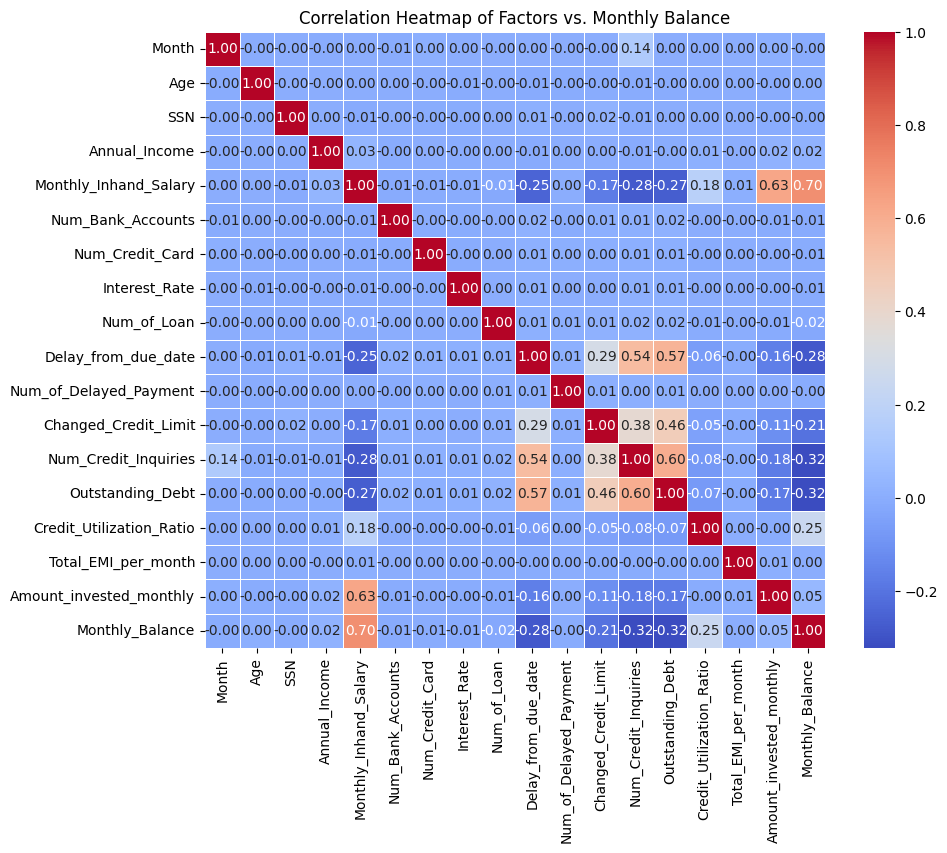

In [ ]:
selected_columns = data.select_dtypes(include=['number'])
# selected_columns = data.select_dtypes(include=['number'])


correlation_matrix = selected_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
plt.show()

#### We will fill it using Annual Income

In [ ]:
df=data.copy()

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

data['Monthly_Balance'] = imputer.fit_transform(data[['Monthly_Balance']])

In [ ]:
customer_mode_payment = data.groupby('Monthly_Inhand_Salary')['Monthly_Balance'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(customer_mode_payment)

#### Credit History Age

In [ ]:
data[data['Credit_History_Age'] == '0 Years and 0 Months']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [ ]:
data[data['Credit_History_Age'] == '0 Years and 1 Months']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2088,0x223e,CUS_0xa672,1,Glenn Somervilleo,31,874588010,Entrepreneur,51113.85,4356.487500,7,...,Bad,3164.78,26.079198,0 Years and 1 Months,Yes,214.843877,228.658623,Low_spent_Large_value_payments,262.146249,Standard
2304,0x2382,CUS_0xadb7,1,Emilym,548,332221188,Architect,33314.96,2955.246667,10,...,Bad,3271.84,34.206177,0 Years and 1 Months,Yes,98.193090,184.666686,Low_spent_Small_value_payments,302.664891,Poor


In [ ]:
data[data['Name']=='Glenn Somervilleo']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2088,0x223e,CUS_0xa672,1,Glenn Somervilleo,31,874588010,Entrepreneur,51113.85,4356.4875,7,...,Bad,3164.78,26.079198,0 Years and 1 Months,Yes,214.843877,228.658623,Low_spent_Large_value_payments,262.146249,Standard
2089,0x223f,CUS_0xa672,2,Glenn Somervilleo,31,874588010,Entrepreneur,51113.85,4356.4875,7,...,Bad,3164.78,27.853816,0 Years and 2 Months,Yes,214.843877,155.032912,High_spent_Medium_value_payments,315.771961,Standard
2090,0x2240,CUS_0xa672,3,Glenn Somervilleo,31,874588010,Entrepreneur,51113.85,4356.4875,7,...,Bad,3164.78,24.725809,0 Years and 3 Months,Yes,37002.000000,126.212948,High_spent_Medium_value_payments,344.591924,Standard
2091,0x2241,CUS_0xa672,4,Glenn Somervilleo,31,874588010,Entrepreneur,51113.85,4356.4875,7,...,Bad,3164.78,26.473002,0 Years and 4 Months,Yes,214.843877,134.236784,High_spent_Medium_value_payments,336.568088,Standard
2092,0x2242,CUS_0xa672,5,Glenn Somervilleo,31,874588010,Entrepreneur,51113.85,4356.4875,7,...,Bad,3164.78,32.385290,0 Years and 5 Months,Yes,214.843877,317.877106,Low_spent_Small_value_payments,192.927767,Standard
2093,0x2243,CUS_0xa672,6,Glenn Somervilleo,31,874588010,Entrepreneur,51113.85,4356.4875,7,...,Bad,3164.78,24.572227,0 Years and 6 Months,Yes,214.843877,165.724199,Low_spent_Medium_value_payments,335.080674,Standard
2094,0x2244,CUS_0xa672,7,Glenn Somervilleo,31,874588010,Entrepreneur,51113.85,4356.4875,7,...,Bad,3164.78,33.359840,0 Years and 7 Months,Yes,214.843877,272.371749,Low_spent_Medium_value_payments,228.433124,Standard
2095,0x2245,CUS_0xa672,8,Glenn Somervilleo,32,874588010,Entrepreneur,51113.85,4356.4875,7,...,Bad,3164.78,36.625704,0 Years and 8 Months,Yes,214.843877,107.712519,Low_spent_Large_value_payments,383.092354,Standard


In [ ]:
data[data['Credit_History_Age'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
19,0x161d,CUS_0x2dbc,4,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,Good
40,0x163e,CUS_0x95ee,1,Np,31,612708987,Lawyer,73928.46,5988.705000,4,...,Good,548.20,39.962685,NaN,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good
42,0x1640,CUS_0x95ee,3,Np,31,612708987,Lawyer,73928.46,5988.705000,4,...,Good,548.20,40.712187,NaN,No,0.000000,150.059734,High_spent_Medium_value_payments,698.810766,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,1,Ryana,33,837859800,Media_Manager,59146.36,4908.863333,2,...,Good,418.03,34.720661,NaN,No,26.778419,606.436542,Low_spent_Small_value_payments,270.099963,Standard
99963,0x25fb9,CUS_0x372c,4,Lucia Mutikanik,500,340857301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,High_spent_Large_value_payments,270.099963,Standard
99968,0x25fc2,CUS_0xf16,1,Maria Sheahanb,44,868702218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,39.868572,NaN,NM,41.113561,52.951978,High_spent_Small_value_payments,270.099963,Good
99975,0x25fc9,CUS_0xf16,8,Maria Sheahanb,45,868702218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,270.099963,Good


In [ ]:
df=data.copy()

In [ ]:
df2=df.copy()


In [ ]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x

In [ ]:
data.Credit_History_Age = data.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(np.float64)

In [ ]:
customer_ids = data[(data['Credit_History_Age'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Credit_History_Age'] = data.groupby('Customer_ID')['Credit_History_Age'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [ ]:
data[data['Name']=='Arunah']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3200,0x28c2,CUS_0x9953,1,Arunah,43,792026835,Journalist,8875.135,989.594583,8,...,Standard,1353.77,25.732031,206.0,Yes,9.058562,50.404981,Low_spent_Large_value_payments,309.495915,Poor
3201,0x28c3,CUS_0x9953,2,Arunah,43,792026835,Journalist,8875.135,989.594583,8,...,Standard,1353.77,32.500592,206.0,Yes,9.058562,119.944829,Low_spent_Small_value_payments,259.956067,Poor
3202,0x28c4,CUS_0x9953,3,Arunah,43,792026835,Journalist,8875.135,989.594583,8,...,Standard,1353.77,24.461440,207.0,Yes,9.058562,36.978320,Low_spent_Small_value_payments,342.922576,Poor
3203,0x28c5,CUS_0x9953,4,Arunah,43,792026835,Journalist,8875.135,989.594583,8,...,Standard,1353.77,27.714178,208.0,Yes,9.058562,124.168291,Low_spent_Small_value_payments,255.732605,Poor
3204,0x28c6,CUS_0x9953,5,Arunah,43,792026835,Journalist,8875.135,989.594583,8,...,Standard,1353.77,33.880002,209.0,Yes,9.058562,34.267712,Low_spent_Medium_value_payments,335.633185,Poor
3205,0x28c7,CUS_0x9953,6,Arunah,43,792026835,Journalist,8875.135,989.594583,8,...,Standard,1353.77,33.343920,210.0,Yes,9.058562,26.986045,Low_spent_Medium_value_payments,342.914852,Poor
3206,0x28c8,CUS_0x9953,7,Arunah,43,792026835,Journalist,8875.135,989.594583,8,...,Standard,1353.77,27.489991,211.0,Yes,9.058562,55.431599,Low_spent_Medium_value_payments,314.469297,Poor
3207,0x28c9,CUS_0x9953,8,Arunah,43,792026835,Journalist,8875.135,989.594583,8,...,Standard,1353.77,29.703884,212.0,Yes,9.058562,84.287820,Low_spent_Small_value_payments,295.613076,Poor
13760,0x66a2,CUS_0x1009,1,Arunah,25,63676938,Mechanic,52312.680,4250.390000,6,...,Standard,202.68,23.679534,365.0,NM,108.366467,261.210979,Low_spent_Medium_value_payments,335.461554,Standard
13761,0x66a3,CUS_0x1009,2,Arunah,25,63676938,Mechanic,52312.680,4250.390000,6,...,Standard,202.68,28.451199,366.0,Yes,108.366467,142.464730,High_spent_Medium_value_payments,424.207803,Standard


In [ ]:
data['Num_of_Delayed_Payment']

0        7.0
1        7.0
2        7.0
3        4.0
4        4.0
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    6.0
99999    6.0
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

#### Age

In [ ]:
data[data['Age'] < 15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
408,0x1866,CUS_0xb986,1,Simon Jessope,14,180887800,Developer,39887.22,3224.935000,9,...,Bad,3119.60,30.188059,149.0,Yes,133.470845,198.996751,Low_spent_Medium_value_payments,270.025904,Poor
409,0x1867,CUS_0xb986,2,Simon Jessope,14,180887800,Developer,39887.22,3224.935000,9,...,Bad,3119.60,26.112222,150.0,Yes,133.470845,153.270725,High_spent_Medium_value_payments,295.751929,Poor
410,0x1868,CUS_0xb986,3,Simon Jessope,14,180887800,Developer,39887.22,3224.935000,9,...,Bad,3119.60,38.238966,151.0,Yes,133.470845,319.492374,Low_spent_Small_value_payments,159.530281,Poor
411,0x1869,CUS_0xb986,4,Simon Jessope,14,180887800,Developer,39887.22,3224.935000,9,...,Bad,3119.60,37.089604,152.0,NM,133.470845,207.793928,Low_spent_Small_value_payments,176.931478,Poor
412,0x186a,CUS_0xb986,5,Simon Jessope,14,180887800,Developer,39887.22,3224.935000,9,...,Bad,3119.60,36.970608,153.0,Yes,133.470845,96.095482,High_spent_Medium_value_payments,342.927173,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98051,0x25485,CUS_0x5602,4,James Tophamy,14,878335924,Writer,15360.58,981.048333,6,...,Standard,1521.43,38.365436,143.0,Yes,20.753796,100.084509,Low_spent_Small_value_payments,267.266528,Poor
98052,0x25486,CUS_0x5602,5,James Tophamy,14,878335924,Writer,15360.58,981.048333,6,...,Standard,1521.43,30.398461,144.0,Yes,20.753796,99.011062,Low_spent_Small_value_payments,268.339975,Poor
98053,0x25487,CUS_0x5602,6,James Tophamy,14,878335924,Writer,15360.58,981.048333,6,...,Standard,1521.43,38.597860,145.0,Yes,20.753796,89.358084,Low_spent_Small_value_payments,267.992953,Poor
98054,0x25488,CUS_0x5602,7,James Tophamy,14,878335924,Writer,15360.58,981.048333,6,...,Standard,1521.43,33.738647,146.0,Yes,20.753796,77.205415,Low_spent_Medium_value_payments,280.145622,Poor


In [ ]:
data[(data['Age'] < 14) | (data['Age'] > 70)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
56,0x1656,CUS_0x5407,1,Annk,7580,500926408,Media_Manager,34081.38,2611.115000,8,...,Standard,1704.18,24.448063,176.0,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor
113,0x16ab,CUS_0xff4,2,Poornimaf,500,655057666,Entrepreneur,25546.26,2415.855000,8,...,Standard,758.44,29.711376,219.0,Yes,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard
122,0x16b8,CUS_0x33d2,3,Chalmersa,181,965462491,Scientist,31993.78,2942.148333,6,...,Standard,818.22,27.380109,204.0,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,Standard
219,0x1749,CUS_0x3edc,4,Williamso,995,663163845,Accountant,43070.24,3622.186667,3,...,Standard,1233.10,24.331772,233.0,Yes,30.576085,74.920375,High_spent_Medium_value_payments,506.722207,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,2,Phil Wahbao,2263,683597399,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,25.982154,196.0,No,45.076827,74.713580,High_spent_Small_value_payments,270.099963,Poor
99937,0x25f93,CUS_0xad4f,2,Sabina Zawadzkig,500,226450652,Developer,22620.79,1722.065833,7,...,Standard,642.46,31.841872,352.0,No,0.000000,105.076293,Low_spent_Large_value_payments,270.099963,Standard
99950,0x25fa4,CUS_0x51b3,7,Ryana,1342,837859800,Media_Manager,59146.36,4908.863333,3,...,Good,418.03,38.199635,247.0,No,26.778419,502.376320,Low_spent_Small_value_payments,270.099963,Standard
99963,0x25fb9,CUS_0x372c,4,Lucia Mutikanik,500,340857301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,30.625298,340.0,No,34.975457,31.193919,High_spent_Large_value_payments,270.099963,Standard


In [ ]:
def replace_age(group):
    min_age = group['Age'].min()
    max_age = group['Age'].max()
    group['Age'] = group['Age'].apply(lambda x: min_age if x < 14 or x > 70 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_age).reset_index(drop=True)

In [ ]:
data['Age'].describe()

count    100000.000000
mean         33.303370
std          10.764915
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

#### Interest rate

In [ ]:
def replace_Interest_Rate(group):
    min_Interest_Rate = group['Interest_Rate'].min()
    max_Interest_Rate = group['Interest_Rate'].max()
    group['Interest_Rate'] = group['Interest_Rate'].apply(lambda x: min_Interest_Rate if x < 1 or x > 40 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Interest_Rate).reset_index(drop=True)

In [ ]:
data['Interest_Rate'].describe()

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

#### Annual Income --> Still Not Sure

In [ ]:
data['Annual_Income'].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [ ]:
def replace_Annual_Income(group):
    min_Annual_Income = group['Annual_Income'].min()
    max_Annual_Income = group['Annual_Income'].max()
    group['Annual_Income'] = group['Annual_Income'].apply(lambda x: min_Annual_Income if  x > 0.2e+06 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Annual_Income).reset_index(drop=True)

In [ ]:
data['Annual_Income'].describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

#### Num Credit Card--> Still Not Sure

In [ ]:
data['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [ ]:
def replace_Num_Credit_Card(group):
    min_Num_Credit_Card = group['Num_Credit_Card'].min()
    max_Num_Credit_Card = group['Num_Credit_Card'].max()
    group['Num_Credit_Card'] = group['Num_Credit_Card'].apply(lambda x: min_Num_Credit_Card if x <1 or x > 15 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_Credit_Card).reset_index(drop=True)

In [ ]:
data['Num_Credit_Card'].describe()

count    100000.000000
mean          5.533600
std           2.067683
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          15.000000
Name: Num_Credit_Card, dtype: float64

#### Num of Delayed Payment

In [ ]:
data['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         30.898505
std         222.891352
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [ ]:
def replace_Num_of_Delayed_Payment(group):
    min_Num_of_Delayed_Payment = group['Num_of_Delayed_Payment'].min()
    max_Num_of_Delayed_Payment = group['Num_of_Delayed_Payment'].max()
    group['Num_of_Delayed_Payment'] = group['Num_of_Delayed_Payment'].apply(lambda x: min_Num_of_Delayed_Payment if x <1 or x > 40 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_of_Delayed_Payment).reset_index(drop=True)

In [ ]:
data['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         13.325213
std           6.262664
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          34.000000
Name: Num_of_Delayed_Payment, dtype: float64

#### Num Bank Accounts

In [ ]:
data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].abs()
def replace_Num_Bank_Accounts(group):
    min_Num_Bank_Accounts = group['Num_Bank_Accounts'].min()
    max_Num_Bank_Accounts = group['Num_Bank_Accounts'].max()
    group['Num_Bank_Accounts'] = group['Num_Bank_Accounts'].apply(lambda x: min_Num_Bank_Accounts if x <1 or x > 20 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_Bank_Accounts).reset_index(drop=True)

In [ ]:
# def replace_Num_Bank_Accounts(group):
#     q1 = group['Num_Bank_Accounts'].quantile(0.25)
#     q3 = group['Num_Bank_Accounts'].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     group['Num_Bank_Accounts'] = group['Num_Bank_Accounts'].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
#     return group

# data = data.groupby('Customer_ID').apply(replace_Num_Bank_Accounts).reset_index(drop=True)


In [ ]:
data['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
6     13177
7     12996
8     12941
4     12346
5     12297
3     12105
9      5500
10     5329
1      4561
0      4396
2      4342
11        9
18        1
Name: count, dtype: int64

In [ ]:
data['Num_Bank_Accounts'].describe()

count    100000.000000
mean          5.368980
std           2.593184
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          18.000000
Name: Num_Bank_Accounts, dtype: float64

#### Num of Loan

In [ ]:
data[data['Num_of_Loan']>10]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
11,0x66a5,CUS_0x1009,4,Arunah,26,63676938,Mechanic,52312.68,4250.390000,6,...,Standard,202.68,24.996239,368.0,Yes,108.366467,171.450443,High_spent_Small_value_payments,405.222090,Standard
54,0x1f6e0,CUS_0x1018,7,Felsenthalq,15,731198119,Accountant,61194.81,5014.567500,7,...,Bad,2773.09,25.120102,170.0,Yes,225.368691,200.294654,Low_spent_Medium_value_payments,355.793405,Poor
101,0x21d8b,CUS_0x1038,6,B.h,27,355007832,Architect,129473.16,10959.430000,3,...,Standard,568.21,36.833587,238.0,Yes,255.327905,893.818725,Low_spent_Large_value_payments,216.796370,Standard
128,0x188be,CUS_0x1048,1,Janet McGurtyg,26,808812470,Accountant,42387.54,3680.295000,3,...,Standard,1835.67,34.096311,113.0,Yes,225.883369,376.154577,Low_spent_Medium_value_payments,45.991554,Poor
150,0x2130,CUS_0x104e,7,Kentaros,50,837935062,Teacher,19180.87,1688.405833,8,...,Standard,1127.57,37.747361,301.0,No,57.364211,67.916771,Low_spent_Small_value_payments,333.559602,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99852,0x1208e,CUS_0xfb6,5,Leah Schnurrj,21,668256453,Accountant,42165.91,3658.825833,4,...,Good,981.66,33.942602,365.0,No,0.000000,75.955391,High_spent_Large_value_payments,529.927192,Standard
99881,0x19183,CUS_0xfcb,2,Patrick Temple-Westk,24,765352455,Lawyer,10805.56,627.463333,5,...,Standard,298.98,28.605417,210.0,No,13.161860,71.599293,Low_spent_Small_value_payments,267.985180,Standard
99898,0x1d06c,CUS_0xfd1,3,Frewy,31,389556408,Architect,78666.57,6485.547500,4,...,Standard,1498.70,35.767532,264.0,No,247.851145,189.528371,Low_spent_Medium_value_payments,491.175234,Standard
99927,0x1fec1,CUS_0xfdf,8,Zhua,56,99844997,Mechanic,70114.38,5679.865000,0,...,Good,918.89,40.434529,301.0,No,131.472173,146.860002,High_spent_Large_value_payments,529.654325,Standard


In [ ]:
def replace_Num_of_Loan(group):
    min_Num_of_Loan = group['Num_of_Loan'].min()
    max_Num_of_Loan = group['Num_of_Loan'].max()
    group['Num_of_Loan'] = group['Num_of_Loan'].apply(lambda x: min_Num_of_Loan if x <1 or x > 10 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_of_Loan).reset_index(drop=True)

In [ ]:
data['Num_of_Loan'].describe()

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

#### Total EMI per month

In [ ]:
def replace_Total_EMI_per_month(group):
    min_Total_EMI_per_month = group['Total_EMI_per_month'].min()
    max_Total_EMI_per_month = group['Total_EMI_per_month'].max()
    group['Total_EMI_per_month'] = group['Total_EMI_per_month'].apply(lambda x: min_Total_EMI_per_month if x <1 or x > 400 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Total_EMI_per_month).reset_index(drop=True)

In [ ]:
data['Total_EMI_per_month'].describe()

count    100000.000000
mean         98.793647
std          98.376351
min           0.000000
25%          28.830800
50%          65.645774
75%         143.185801
max        1042.674209
Name: Total_EMI_per_month, dtype: float64

#### Amount invested monthly

In [ ]:
def replace_Amount_invested_monthly(group):
    min_Amount_invested_monthly = group['Amount_invested_monthly'].min()
    max_Amount_invested_monthly = group['Amount_invested_monthly'].max()
    group['Amount_invested_monthly'] = group['Amount_invested_monthly'].apply(lambda x: min_Amount_invested_monthly if x <1 or x > 800 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Amount_invested_monthly).reset_index(drop=True)

In [ ]:
data['Amount_invested_monthly'].describe()

count    100000.000000
mean        176.264024
std         150.669373
min           0.000000
25%          72.774053
50%         127.087701
75%         224.730130
max         799.845975
Name: Amount_invested_monthly, dtype: float64

#### Monthly Inhand Salary --> Not Sure

In [ ]:
# data[data['Monthly_Inhand_Salary'].isnull()]
# def replace_Monthly_Inhand_Salary(group):
#     min_Monthly_Inhand_Salary = group['Monthly_Inhand_Salary'].min()
#     max_Monthly_Inhand_Salary = group['Monthly_Inhand_Salary'].max()
#     group['Monthly_Inhand_Salary'] = group['Monthly_Inhand_Salary'].apply(lambda x: min_Monthly_Inhand_Salary if x <1 or x > 400 else x)
#     return group

# # Apply the function to the DataFrame using groupby and transform
# data = data.groupby('Customer_ID').apply(replace_Monthly_Inhand_Salary).reset_index(drop=True)

In [ ]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
data.dtypes

ID                           object
Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
SSN                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

## Hint: After Filling the data

In [ ]:
# features_to_be_num=['Age','Num_of_Loan','Num_of_Delayed_Payment']
# for feature in features_to_be_num:
#     data[feature] = data[feature].str.extract('(\d+)').astype(int)

# data

In [ ]:
# features_to_be_num=['Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
# for feature in features_to_be_num:
#     data[feature] = data[feature].str.extract(r'(\d+\.\d+)').astype(float)

# data

In [ ]:
# def cleaning(feature):
#     if data[feature] is np.NaN or not isinstance(data, str):
#         return data[feature]
#     else:
#         return data[feature].strip('_ ,"')

In [ ]:
numerical_columns = data.select_dtypes(include=['number'])
numerical_columns

,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,1,17,913741218,30625.94,2706.161667,6,5,27,2,62,25.0,1.63,10.0,1562.91,26.612093,122.0,42.941090,244.750283,252.924793
1,2,17,913741218,30625.94,2706.161667,6,5,27,2,62,23.0,1.63,11.0,1562.91,29.439759,123.0,42.941090,176.132567,311.542510
2,3,17,913741218,30625.94,2706.161667,6,5,27,2,62,28.0,1.63,11.0,1562.91,38.285928,124.0,42.941090,109.056519,368.618557
3,4,17,913741218,30625.94,2706.161667,6,5,27,2,64,25.0,1.63,11.0,1562.91,32.843081,125.0,42.941090,87.909909,419.765167
4,5,17,913741218,30625.94,2706.161667,6,5,27,2,67,25.0,2.63,11.0,1562.91,32.330508,126.0,42.941090,191.834767,305.840309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,29,832888320,41398.44,3749.870000,8,7,13,6,19,12.0,10.07,7.0,1701.88,36.384516,221.0,182.976649,234.354940,270.099963
99996,5,29,832888320,41398.44,3749.870000,8,7,13,6,23,12.0,10.07,7.0,1701.88,26.166508,222.0,182.976649,104.629474,270.099963
99997,6,29,832888320,41398.44,3749.870000,8,7,13,6,23,12.0,10.07,7.0,1701.88,36.970072,223.0,182.976649,47.007379,270.099963
99998,7,30,832888320,41398.44,3749.870000,8,7,13,6,23,12.0,10.07,7.0,1701.88,33.916363,224.0,182.976649,257.989694,270.099963


In [ ]:
data.Credit_Score.value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [ ]:
df2=data.copy()

In [ ]:
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import random
import math

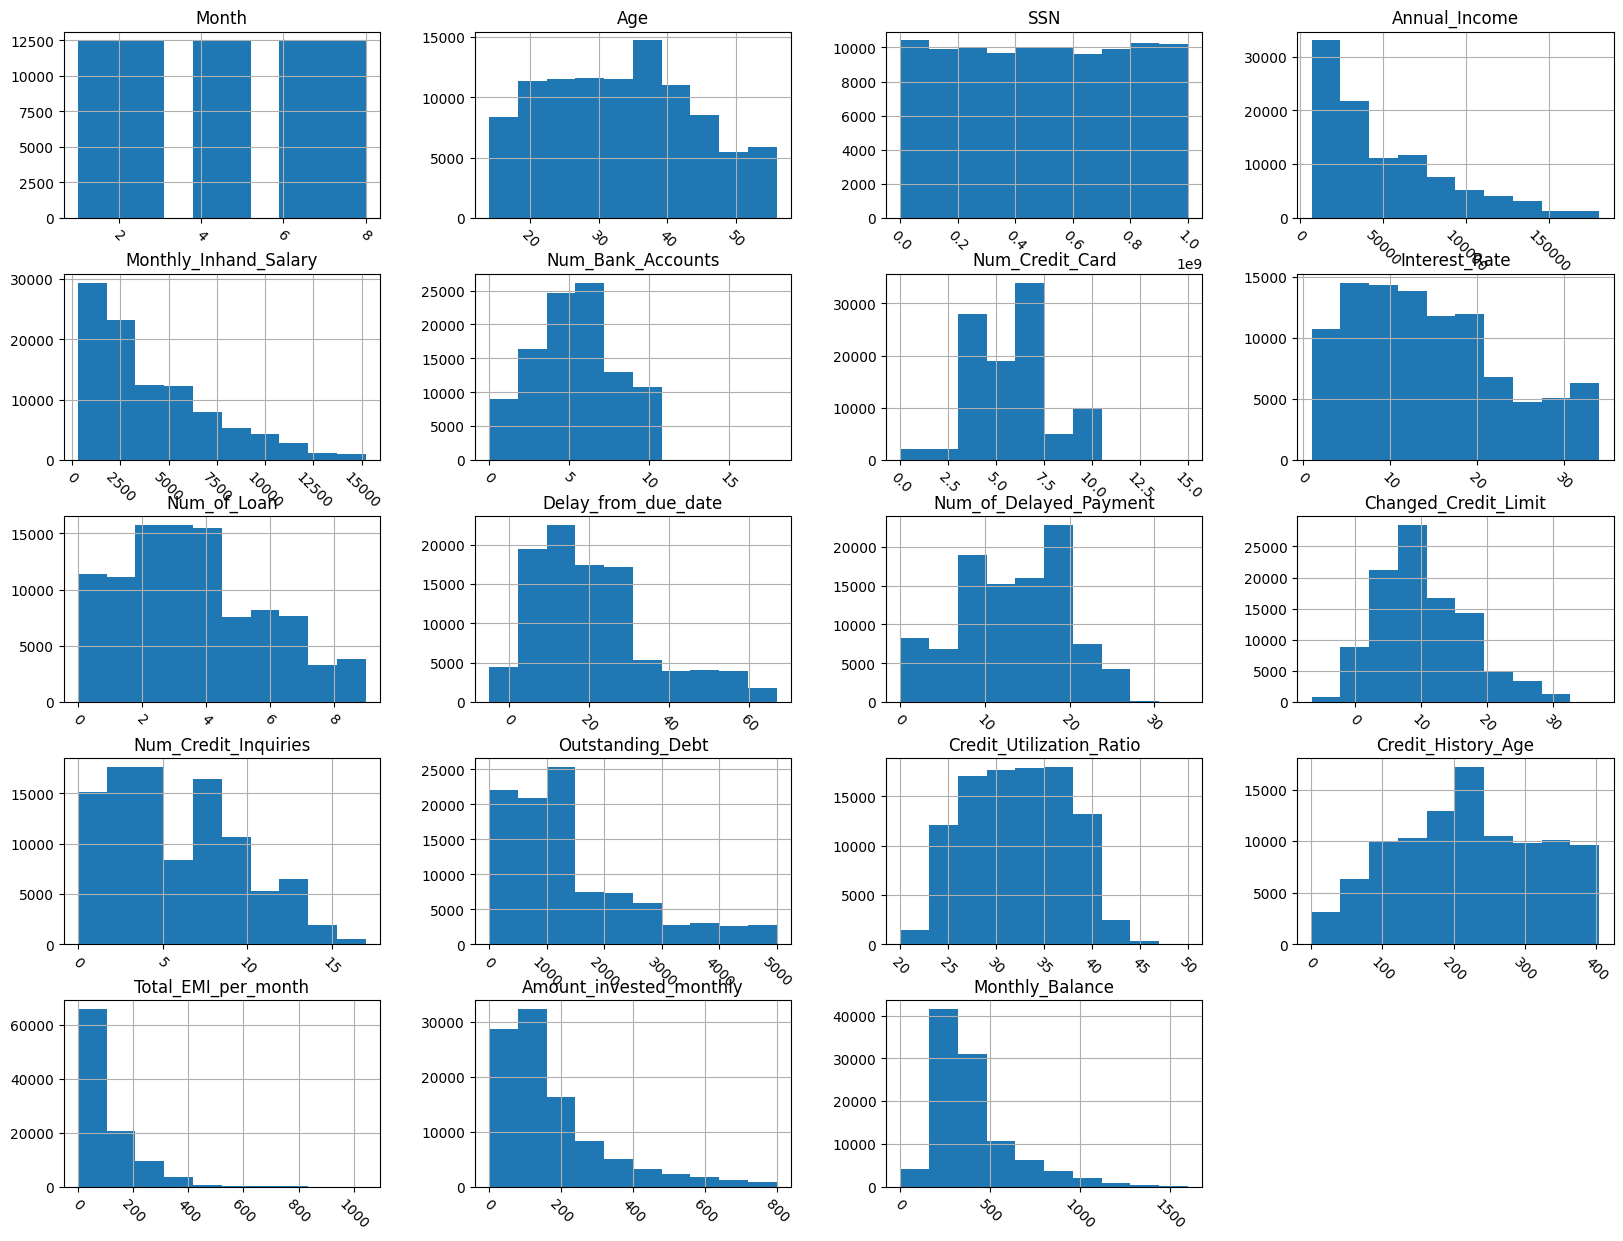

In [ ]:
df2.hist(figsize=(20,15), xrot=-45)
plt.show()

## ploting our target 🎯

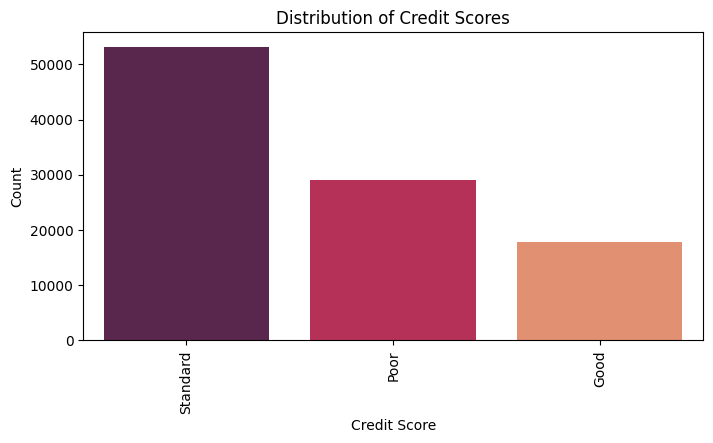

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df2, x='Credit_Score', palette='rocket')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df2.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Factor 1 : Personal information

### What is effect of age on target ?

In [ ]:
df2['Age'].unique()

array([17, 18, 25, 26, 19, 43, 44, 27, 15, 51, 52, 30, 31, 40, 45, 28, 14,
       36, 37, 50, 20, 41, 42, 46, 24, 54, 32, 55, 38, 39, 22, 23, 29, 48,
       49, 35, 53, 21, 33, 34, 47, 16, 56])

<Axes: xlabel='Age', ylabel='Density'>

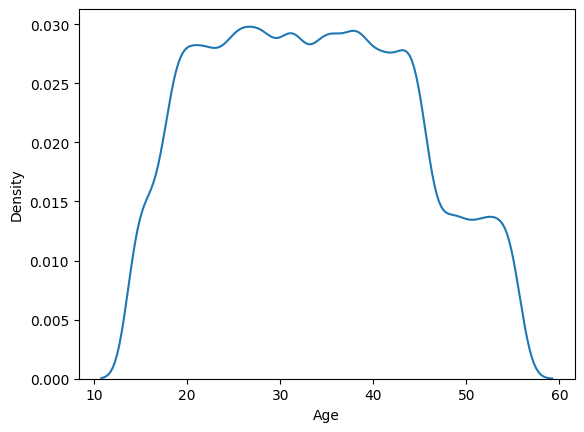

In [ ]:
sns.kdeplot(df2['Age'])

In [ ]:
# Define the age groups and their corresponding labels
age_bins = [14, 24, 34, 44, 54, 64, 74]
age_labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65-74']

# Create the "Grouped_Age" column
df2['Grouped_Age'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the first few rows to verify the new column
print(df2[['Age', 'Grouped_Age']].head())

   Age Grouped_Age
0   17       14-24
1   17       14-24
2   17       14-24
3   17       14-24
4   17       14-24


<Axes: xlabel='Grouped_Age', ylabel='count'>

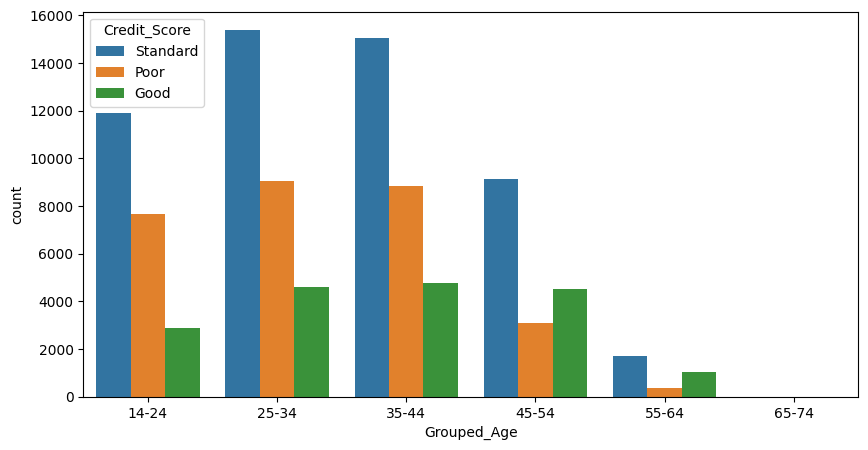

In [ ]:
# Now, use the filtered DataFrame for the countplot
plt.figure(figsize=(10,5))
sns.countplot(data=df2, x='Grouped_Age', hue='Credit_Score')

### Does Occupation play a role?

In [ ]:
data['Occupation'].unique()

array(['Lawyer', 'Mechanic', 'Media_Manager', 'Doctor', 'Journalist',
       'Accountant', 'Manager', 'Entrepreneur', 'Scientist', 'Architect',
       'Teacher', 'Engineer', 'Writer', 'Developer', 'Musician'],
      dtype=object)

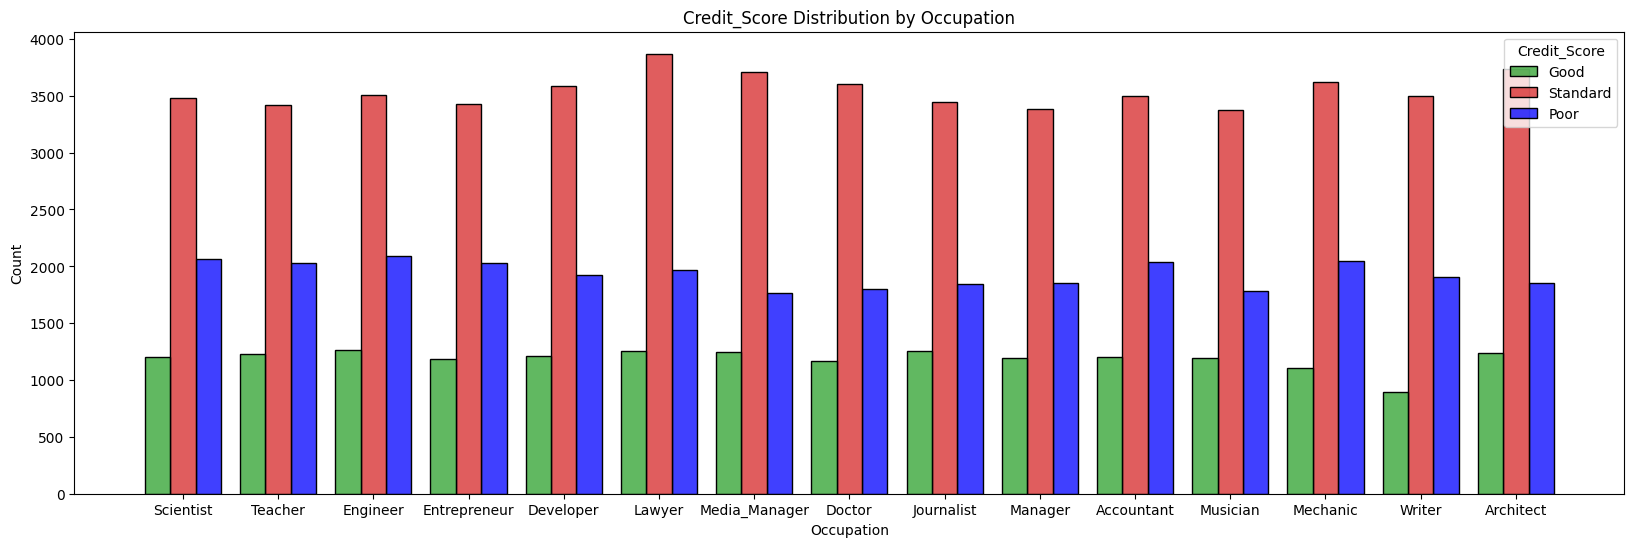

In [ ]:
colors = ["#2ca02c", "#d62728", 'blue']

# Set custom figure dimensions
plt.figure(figsize=(20, 6))

# Create the histogram plot with customized colors and dimensions
sns.histplot(data=df, x="Occupation", hue="Credit_Score", multiple="dodge", shrink=.8, palette=colors)

# Customize other plot properties like titles, labels, etc.
plt.title("Credit_Score Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")

# Display the plot
plt.show()

* the engineer has the higher mount of risk as it is the higher poor credit score

### Which occupation tends to have higher outstanding debt?

In [ ]:
occupation_distribution=df2['Occupation'].value_counts()
occupation_distribution

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [ ]:
col_df =df2.groupby('Occupation')['Outstanding_Debt'].mean().reset_index().sort_values(by='Outstanding_Debt', ascending=False)

# Create a bar plot using Plotly Express
fig = px.bar(col_df, x='Occupation', y='Outstanding_Debt', title='Mean Outstanding Debt by Occupation')
fig.update_layout(xaxis_title='Occupation', yaxis_title='Mean Outstanding Debt')
fig.show()

### Which occupation group have highest and lowest number of loan ?

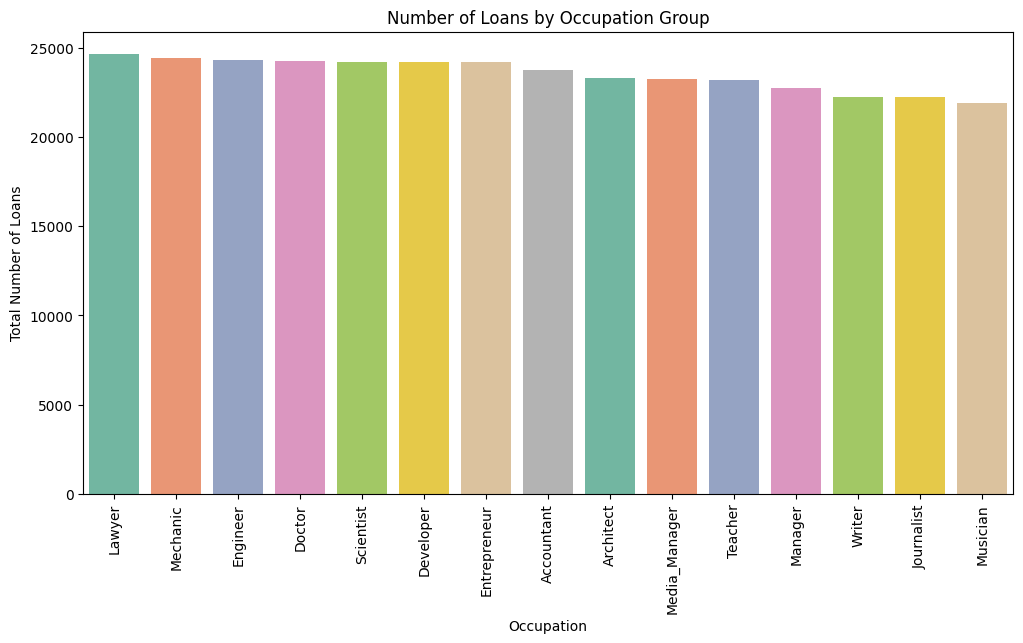

In [ ]:
# Calculate the total number of loans for each occupation group
occupation_loan_counts = df2.groupby('Occupation')['Num_of_Loan'].sum().reset_index()

# Sort the data to find the occupation group with the highest and lowest number of loans
occupation_loan_counts = occupation_loan_counts.sort_values(by='Num_of_Loan', ascending=False)

# Create a bar plot to visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=occupation_loan_counts, x='Occupation', y='Num_of_Loan', palette='Set2')
plt.xlabel('Occupation')
plt.ylabel('Total Number of Loans')
plt.title('Number of Loans by Occupation Group')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Factor 2 : Financial information 💵

## How Annual_salary Affect on our target?

In [ ]:
credit_good = df2[df2.Credit_Score == 'Good']
credit_good.Annual_Income.describe()

count     17828.000000
mean      65203.672105
std       44484.883431
min        7189.540000
25%       29709.730000
50%       44927.860000
75%       97417.425000
max      179825.360000
Name: Annual_Income, dtype: float64

In [ ]:
credit_std = df2[df2.Credit_Score == 'Standard']
credit_std.Annual_Income.describe()

count     53174.000000
mean      50987.164840
std       37569.335731
min        7006.035000
25%       19998.330000
50%       36824.175000
75%       72904.160000
max      179987.280000
Name: Annual_Income, dtype: float64

In [ ]:
credit_poor = df2[df2.Credit_Score == 'Poor']
credit_poor.Annual_Income.describe()

count     28998.000000
mean      40584.515325
std       31969.248921
min        7005.930000
25%       16770.910000
50%       32064.860000
75%       57877.950000
max      179987.280000
Name: Annual_Income, dtype: float64

In [ ]:
credit = {
    'Good' : credit_good.Annual_Income.mean(),
    'Standard' : credit_std.Annual_Income.mean(),
    'Poor' : credit_poor.Annual_Income.mean()
}

count = {
    'Good' : credit_good.Annual_Income.count(),
    'Standard' : credit_std.Annual_Income.count(),
    'Poor' : credit_poor.Annual_Income.count()
}


fig = px.bar(x=list(count.keys()), y=list(count.values()), labels={'x': 'Credit Score', 'y': 'Annual Income'}, title='Variation in Annual Income with Change in Credit Score')
fig.update_traces(marker_color='blue', width=0.4)


fig.add_trace(px.scatter(x=list(credit.keys()), y=list(credit.values()),color_discrete_sequence=['white'] ,labels={'x': 'Credit Score', 'y': 'User'}).data[0])

fig.update_xaxes(type='category')

fig.update_layout(

    plot_bgcolor='gray', paper_bgcolor='gray',
                        title_font=dict(size=25, color='white', family="Muli, sans-serif"),
    font=dict(color='white',size=15)
)

fig.show()

## does the monthly inhand salary affect the target?

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Density'>

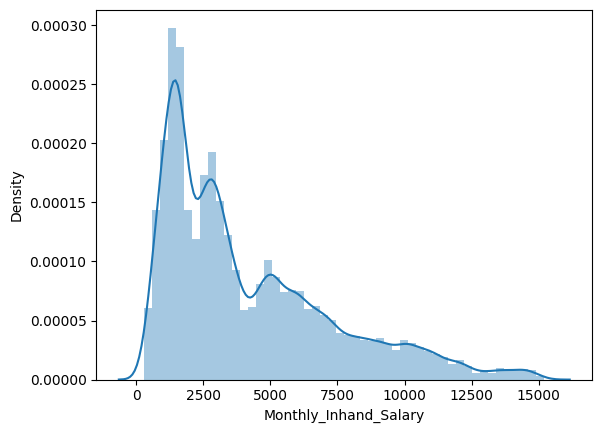

In [ ]:
sns.distplot(df2['Monthly_Inhand_Salary'])

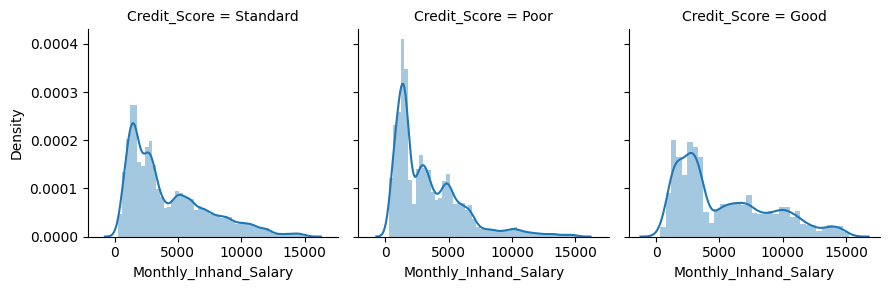

In [ ]:
grid = sns.FacetGrid(df2, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')

## Factor 3 : Bank transactions

## How does number of bank accounts affect the target?

In [ ]:
credit_score = df2['Credit_Score']
num_bank_accounts = df2['Num_Bank_Accounts']

# Exploratory Data Analysis
print("Summary Statistics:")
print(df2[['Credit_Score', 'Num_Bank_Accounts']].describe())

Summary Statistics:
       Num_Bank_Accounts
count      100000.000000
mean            5.368980
std             2.593184
min             0.000000
25%             3.000000
50%             5.000000
75%             7.000000
max            18.000000


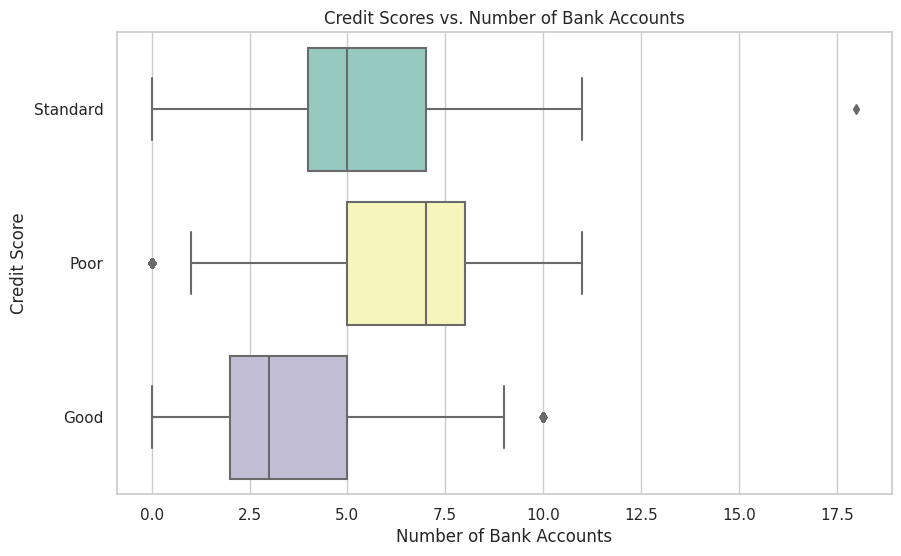

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Bank_Accounts', y='Credit_Score', data=df2, palette="Set3")
plt.title('Credit Scores vs. Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Credit Score')
plt.show()

### Does the number of credit inquiries made by a customer impact their credit score? Is there an optimal number of inquiries to maintain a good credit score?

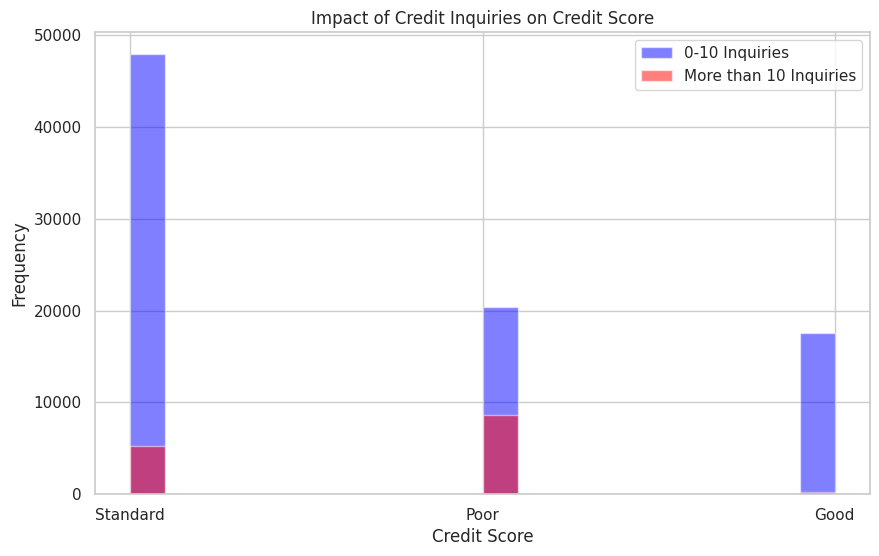

In [ ]:
# Create a histogram to visualize the distribution of credit scores for different numbers of credit inquiries
plt.figure(figsize=(10, 6))
plt.hist(df2[df2['Num_Credit_Inquiries'] <= 10]['Credit_Score'], bins=20, alpha=0.5, label='0-10 Inquiries', color='blue')
plt.hist(df2[df2['Num_Credit_Inquiries'] > 10]['Credit_Score'], bins=20, alpha=0.5, label='More than 10 Inquiries', color='red')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Impact of Credit Inquiries on Credit Score')
plt.legend()
plt.grid(True)
plt.show()


#### What is the relationship between a customer's credit card utilization ratio and their payment behavior? How can we incentivize customers to use their cards more responsibly?

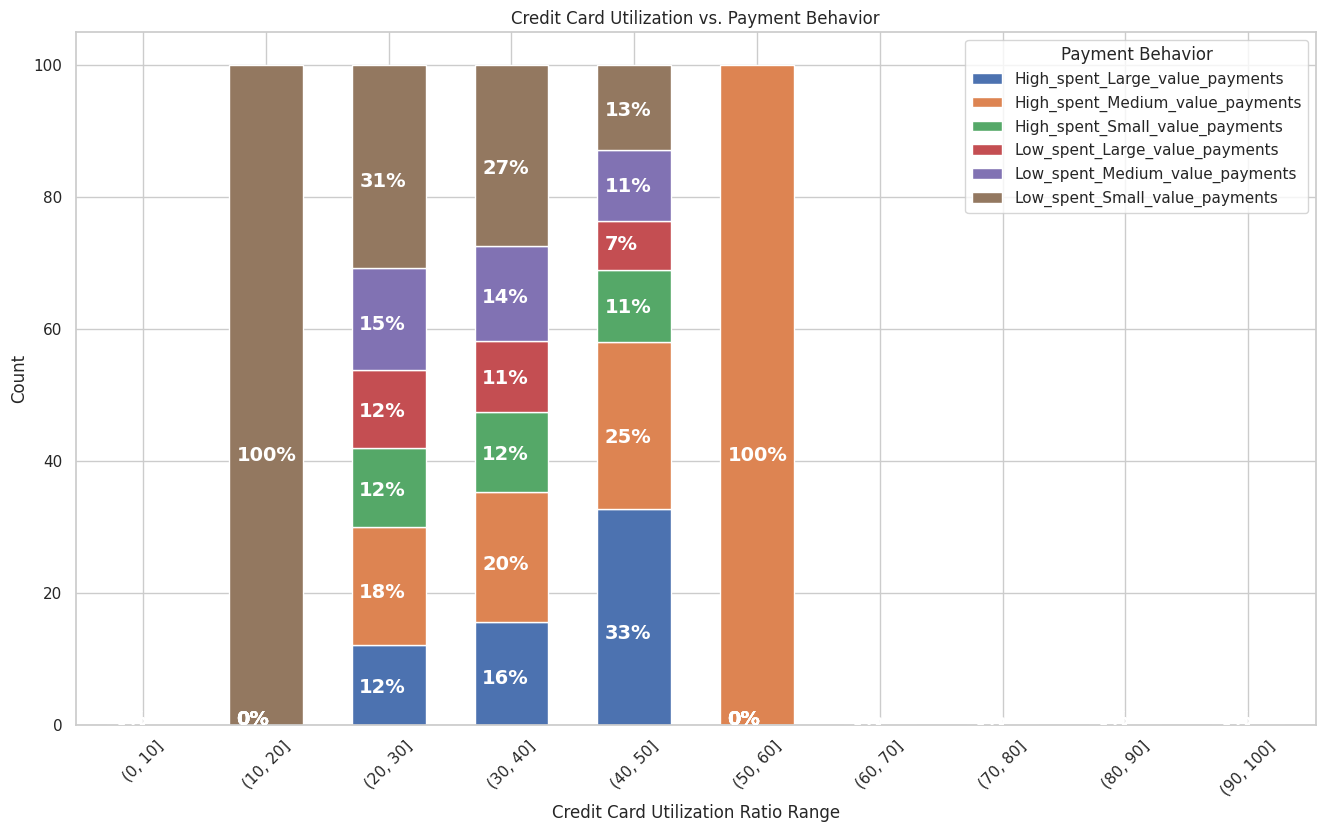

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


df['Utilization_Ratio_Bin'] = pd.cut(df['Credit_Utilization_Ratio'], bins)


grouped = df.groupby(['Utilization_Ratio_Bin', 'Payment_Behaviour']).size().unstack(fill_value=0)


ax = (grouped.T * 100.0 / grouped.T.sum()).T.plot(
    kind='bar',
    width=0.6,  # Increase the bar width
    rot=0,
    stacked=True,
    figsize=(16, 9)  # Adjust the figure size
)


ax.plot()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        '{:.0f}%'.format(height),
        (p.get_x() + 0.1 * width, p.get_y() + 0.4 * height),
        color='white',
        weight='bold',
        size=14,
    )

plt.title('Credit Card Utilization vs. Payment Behavior')
plt.xlabel('Credit Card Utilization Ratio Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Behavior')

plt.show()

#### The Payment behaviour with the credit score

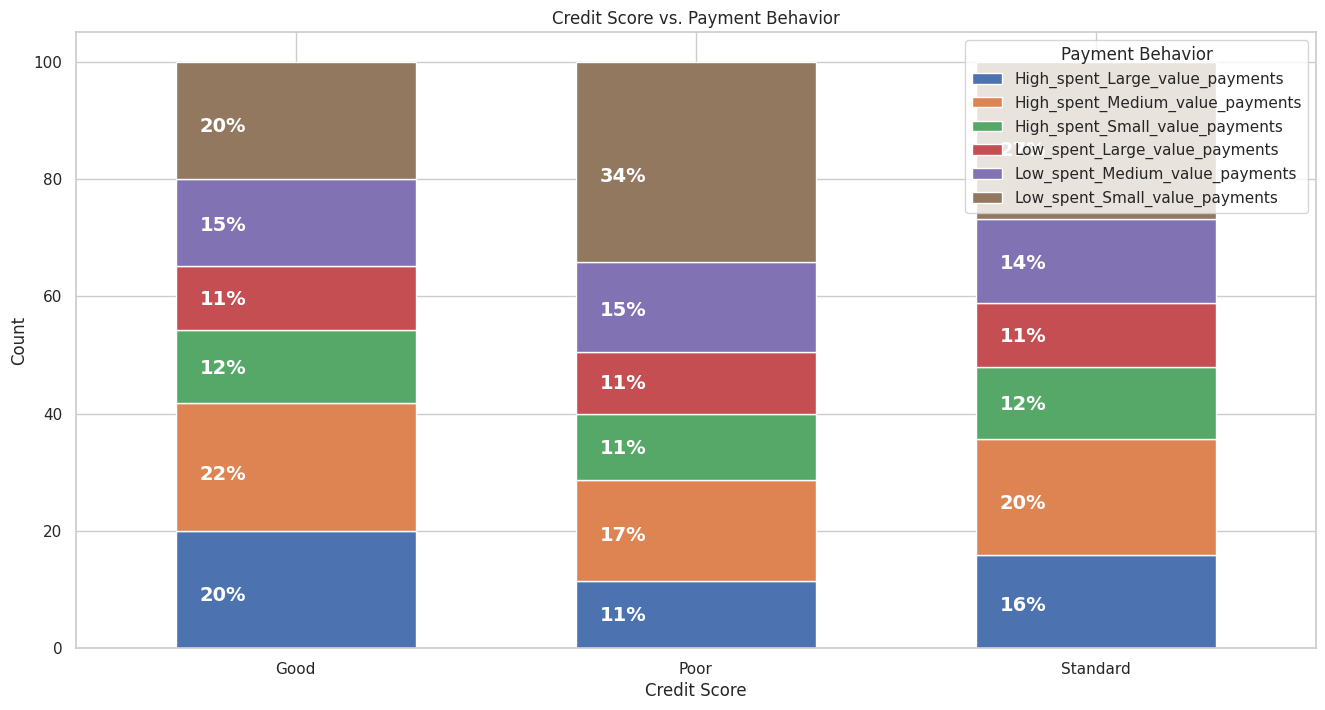

In [ ]:
grouped = df2.groupby(['Credit_Score', 'Payment_Behaviour']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = (grouped.T * 100.0 / grouped.T.sum()).T.plot(
    kind='bar',
    width=0.6,
    rot=0,
    stacked=True,
    figsize=(16, 8)
)

# Add annotations to the bars
ax.plot()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        '{:.0f}%'.format(height),
        (p.get_x() + 0.1 * width, p.get_y() + 0.4 * height),
        color='white',
        weight='bold',
        size=14,
    )

# Customize the plot
plt.title('Credit Score vs. Payment Behavior')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Behavior')

plt.show()

### Checking for im balance data

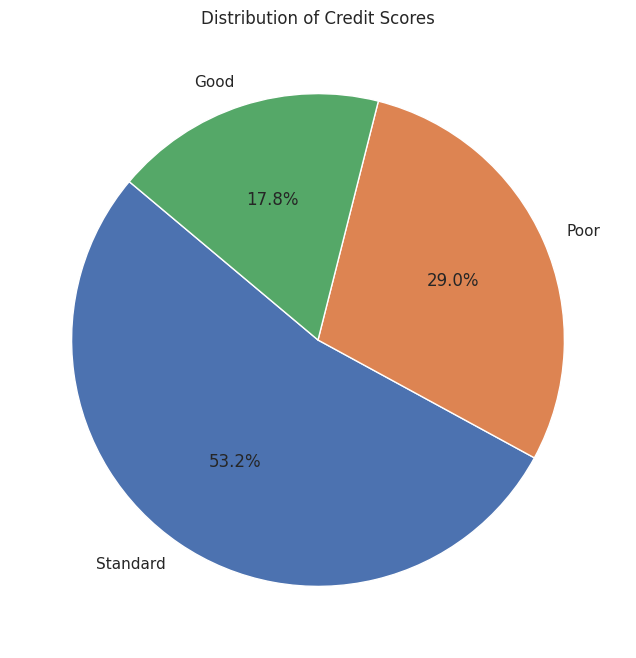

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame named 'df'
# Create a histogram to count the number of customers in each credit score range
plt.figure(figsize=(8, 8))
plt.pie(df2['Credit_Score'].value_counts(), labels=df2['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.show()


## End of Viualization

## ****************************************************************

In [ ]:
df=data.copy()

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.ID = df.ID.apply(lambda x: int(x,16)).astype(np.int64)
df.Customer_ID = df.Customer_ID.apply(lambda x: int(x[4:],16)).astype(np.int64)

In [ ]:
# reciprocal_transformer = FunctionTransformer(lambda x: 1/(x+0.0000001))
# df.Num_Bank_Accounts = reciprocal_transformer.fit_transform(df.Num_Bank_Accounts)

In [ ]:
# power_transform_cols = ['Monthly_Inhand_Salary','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_Credit_Inquiries','Total_EMI_per_month']
# pt = PowerTransformer()

# for col in power_transform_cols:
#     col_tf = pt.fit_transform(df[[col]])
#     df[col] = np.array(col_tf).reshape(col_tf.shape[0])

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,90762,4096,1,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,26.612093,122.0,Yes,42.941090,244.750283,Low_spent_Large_value_payments,252.924793,Standard
1,90763,4096,2,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,29.439759,123.0,Yes,42.941090,176.132567,High_spent_Small_value_payments,311.542510,Poor
2,90764,4096,3,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,38.285928,124.0,Yes,42.941090,109.056519,High_spent_Medium_value_payments,368.618557,Poor
3,90765,4096,4,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.843081,125.0,Yes,42.941090,87.909909,High_spent_Medium_value_payments,419.765167,Poor
4,90766,4096,5,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.330508,126.0,Yes,42.941090,191.834767,Low_spent_Large_value_payments,305.840309,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,154365,4093,4,Damouniq,29,832888320,Scientist,41398.44,3749.870000,8,...,Standard,1701.88,36.384516,221.0,Yes,182.976649,234.354940,High_spent_Medium_value_payments,270.099963,Standard
99996,154366,4093,5,Damouniq,29,832888320,Scientist,41398.44,3749.870000,8,...,Standard,1701.88,26.166508,222.0,Yes,182.976649,104.629474,High_spent_Medium_value_payments,270.099963,Standard
99997,154367,4093,6,Damouniq,29,832888320,Scientist,41398.44,3749.870000,8,...,Standard,1701.88,36.970072,223.0,Yes,182.976649,47.007379,High_spent_Medium_value_payments,270.099963,Standard
99998,154368,4093,7,Damouniq,30,832888320,Scientist,41398.44,3749.870000,8,...,Standard,1701.88,33.916363,224.0,Yes,182.976649,257.989694,High_spent_Small_value_payments,270.099963,Good


# Encoding

In [ ]:
df['Credit_Score'] = LabelEncoder().fit_transform(df['Credit_Score'])
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,90762,4096,1,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,26.612093,122.0,Yes,42.94109,244.750283,Low_spent_Large_value_payments,252.924793,2
1,90763,4096,2,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,29.439759,123.0,Yes,42.94109,176.132567,High_spent_Small_value_payments,311.542510,1
2,90764,4096,3,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,38.285928,124.0,Yes,42.94109,109.056519,High_spent_Medium_value_payments,368.618557,1
3,90765,4096,4,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.843081,125.0,Yes,42.94109,87.909909,High_spent_Medium_value_payments,419.765167,1
4,90766,4096,5,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.330508,126.0,Yes,42.94109,191.834767,Low_spent_Large_value_payments,305.840309,1


In [ ]:
# df['Credit_Score']= LabelEncoder().fit_transform(df['Credit_Score'])
df['Credit_Score'].value_counts()


Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

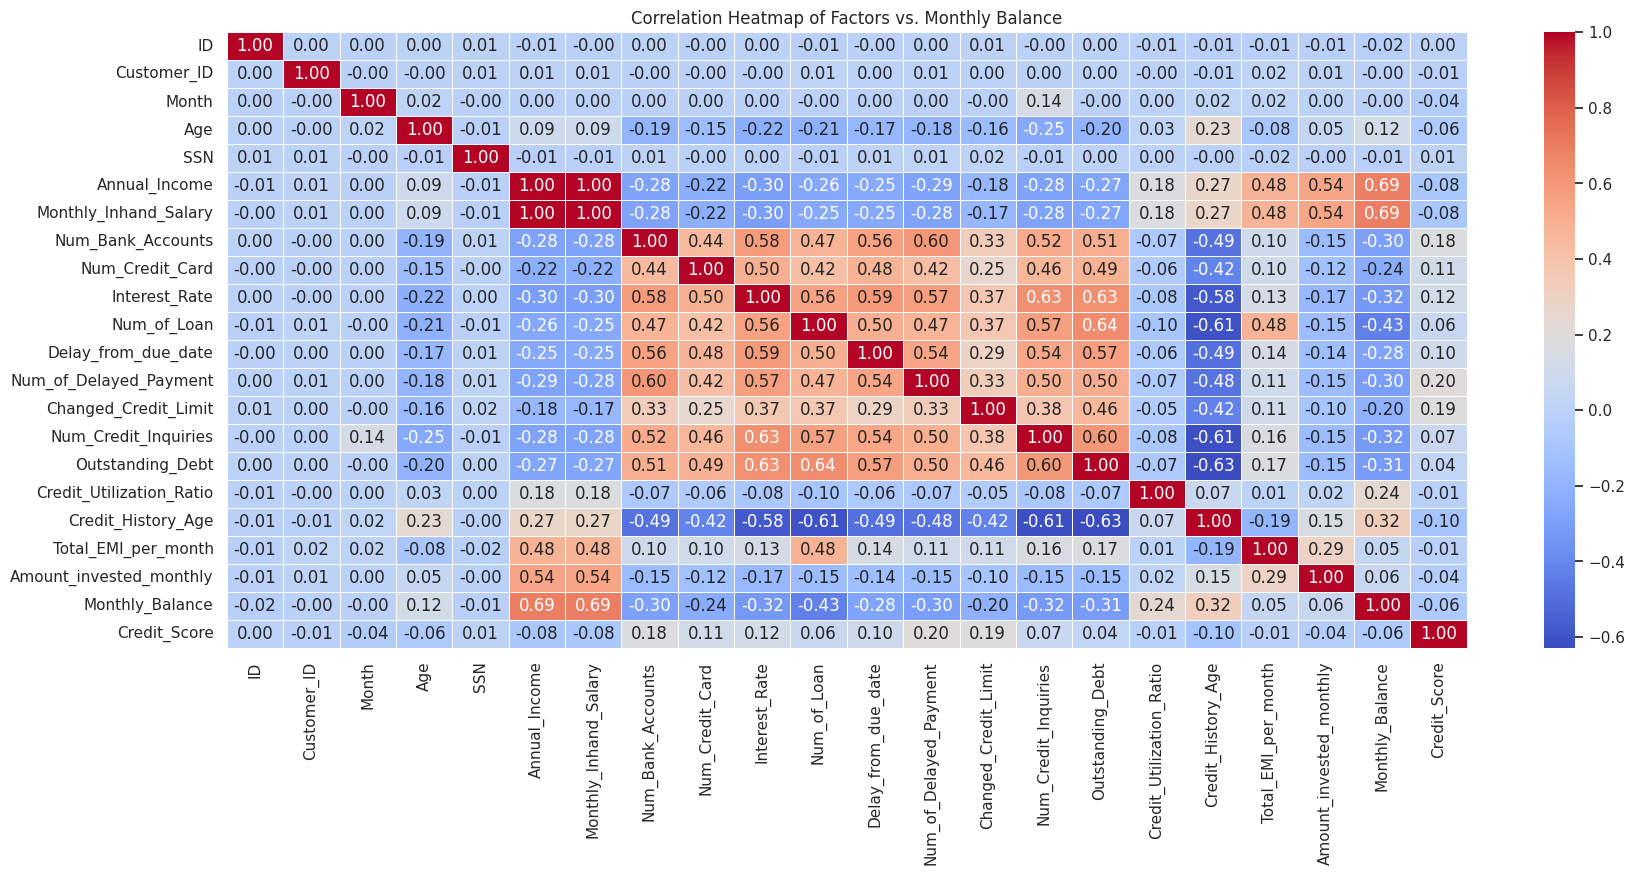

In [ ]:
selected_columns = df.select_dtypes(include=['number'])
# selected_columns = df.select_dtypes(include=['number'])


correlation_matrix = selected_columns.corr()


plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
plt.show()

In [ ]:
import category_encoders as ce

In [ ]:
columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']
for item in columns:
    df[item] = ce.LeaveOneOutEncoder().fit_transform(df[item],df['Credit_Score'])
df['Credit_Mix']

0        1.369251
1        1.369294
2        1.369294
3        1.369294
4        1.369294
           ...   
99995    1.670295
99996    1.670295
99997    1.670295
99998    1.670338
99999    1.670338
Name: Credit_Mix, Length: 100000, dtype: float64

In [ ]:
df[['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']]

,Payment_of_Min_Amount,Payment_Behaviour,Name,Occupation,Credit_Mix
0,1.531161,1.359073,1.533333,1.368147,1.369251
1,1.531180,1.355706,1.600000,1.368288,1.369294
2,1.531180,1.343919,1.600000,1.368288,1.369294
3,1.531180,1.343919,1.600000,1.368288,1.369294
4,1.531180,1.359165,1.600000,1.368288,1.369294
...,...,...,...,...,...
99995,1.531161,1.343868,1.428571,1.337980,1.670295
99996,1.531161,1.343868,1.428571,1.337980,1.670295
99997,1.531161,1.343868,1.428571,1.337980,1.670295
99998,1.531199,1.355789,1.714286,1.338277,1.670338


In [ ]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                        float64
Age                           int64
SSN                           int64
Occupation                  float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                

In [ ]:
columns2 =['Annual_Income','Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
                           'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age',
                           'Outstanding_Debt','Total_EMI_per_month']
for item in columns2:
    mean_encoding = df.groupby([item])['Credit_Score'].mean()
    df[item] = df[item].map(mean_encoding)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,90762,4096,1,1.533333,1.469375,913741218,1.368147,1.125,2706.161667,6,...,1.369251,1.125,26.612093,1.471264,1.531161,1.125,244.750283,1.359073,2.0,2
1,90763,4096,2,1.600000,1.469375,913741218,1.368288,1.125,2706.161667,6,...,1.369294,1.125,29.439759,1.493976,1.531180,1.125,176.132567,1.355706,1.0,1
2,90764,4096,3,1.600000,1.469375,913741218,1.368288,1.125,2706.161667,6,...,1.369294,1.125,38.285928,1.432099,1.531180,1.125,109.056519,1.343919,1.0,1
3,90765,4096,4,1.600000,1.469375,913741218,1.368288,1.125,2706.161667,6,...,1.369294,1.125,32.843081,1.457983,1.531180,1.125,87.909909,1.343919,1.0,1
4,90766,4096,5,1.600000,1.469375,913741218,1.368288,1.125,2706.161667,6,...,1.369294,1.125,32.330508,1.471963,1.531180,1.125,191.834767,1.359165,1.0,1


In [ ]:
df.drop('Type_of_Loan',axis=1,inplace=True)

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Feature Selection

In [ ]:
X=df.drop('Credit_Score',axis=1)
y = df.Credit_Score

#### Name, Annual Income, Number of Loans, and Outstanding Debt could  be predicted by other independent variables in the dataset.

In [ ]:
df.to_csv('data.csv')

In [ ]:
df3=df.copy()

In [ ]:
columns3 =['Name','Annual_Income','Num_of_Loan',
                           'Outstanding_Debt']
for item in columns3:
    df3.drop(item,axis=1,inplace=True)
X=df3.drop('Credit_Score',axis=1)
y = df3.Credit_Score

In [ ]:
X=df3.drop('Credit_Score',axis=1)
y = df3.Credit_Score

In [ ]:
y

0        2
1        1
2        1
3        1
4        1
        ..
99995    2
99996    2
99997    2
99998    0
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [ ]:
X

,ID,Customer_ID,Month,Age,SSN,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,90762,4096,1,1.469375,913741218,1.368147,2706.161667,6,1.336984,1.314024,...,1.190909,1.398441,1.369251,26.612093,1.471264,1.531161,1.125,244.750283,1.359073,2.000000
1,90763,4096,2,1.469375,913741218,1.368288,2706.161667,6,1.336984,1.314024,...,1.190909,1.356203,1.369294,29.439759,1.493976,1.531180,1.125,176.132567,1.355706,1.000000
2,90764,4096,3,1.469375,913741218,1.368288,2706.161667,6,1.336984,1.314024,...,1.190909,1.356203,1.369294,38.285928,1.432099,1.531180,1.125,109.056519,1.343919,1.000000
3,90765,4096,4,1.469375,913741218,1.368288,2706.161667,6,1.336984,1.314024,...,1.190909,1.356203,1.369294,32.843081,1.457983,1.531180,1.125,87.909909,1.343919,1.000000
4,90766,4096,5,1.469375,913741218,1.368288,2706.161667,6,1.336984,1.314024,...,1.039216,1.356203,1.369294,32.330508,1.471963,1.531180,1.125,191.834767,1.359165,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,154365,4093,4,1.396595,832888320,1.337980,3749.870000,8,1.454097,1.805099,...,1.386667,1.476322,1.670295,36.384516,1.345055,1.531161,1.500,234.354940,1.343868,1.391176
99996,154366,4093,5,1.396595,832888320,1.337980,3749.870000,8,1.454097,1.805099,...,1.386667,1.476322,1.670295,26.166508,1.338422,1.531161,1.500,104.629474,1.343868,1.391176
99997,154367,4093,6,1.396595,832888320,1.337980,3749.870000,8,1.454097,1.805099,...,1.386667,1.476322,1.670295,36.970072,1.423181,1.531161,1.500,47.007379,1.343868,1.391176
99998,154368,4093,7,1.383708,832888320,1.338277,3749.870000,8,1.454097,1.805099,...,1.386667,1.476322,1.670338,33.916363,1.361446,1.531199,1.500,257.989694,1.355789,1.391176


In [ ]:
X.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

pd.to_c

----------------------

# `05` Logistic Regression

Using `sklearn` implementation of logistic regression to model the data.

Hint: Look for `sklearn.linear_model.LogisticRegression` class.

In [ ]:
X.sample(5)

,ID,Customer_ID,Month,Age,SSN,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
99376,72606,3780,1,1.230050,910163301,1.371808,2972.130000,5,0.440073,1.354419,...,1.356164,1.245254,0.863016,28.431851,1.269504,1.099647,0.500,388.087461,1.385327,0.0
74083,95529,2473,4,1.336964,754061041,1.353475,4593.352500,10,1.335502,1.372995,...,1.826087,1.476322,1.369251,30.408995,1.467532,1.531161,2.000,83.032542,1.317130,2.0
65410,45032,35426,3,1.345839,24461152,1.353773,5075.941667,3,1.372580,1.293956,...,1.112500,1.209916,0.863016,30.712426,1.366109,1.333167,0.000,83.956227,1.343971,0.0
89460,110362,46779,5,1.416844,415948307,1.371661,626.761250,7,1.454097,1.314024,...,1.647059,1.453179,1.670316,28.716049,1.413043,1.531180,1.125,65.577366,1.385291,1.0
25461,69467,16819,6,1.372265,305824727,1.341316,10507.117500,4,1.385296,1.351614,...,1.217391,1.347704,0.862950,38.994126,1.278626,1.099591,2.000,203.912106,1.343868,2.0


In [ ]:
X.drop(columns=['ID', 'Customer_ID', 'SSN'], inplace= True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

In [ ]:
m = LogisticRegression(class_weight = 'balanced', random_state=1234)
m.fit(X,y)

LogisticRegression(class_weight='balanced', random_state=1234)

In [ ]:
m.score(X, y)

0.64514

In [ ]:
pre = m.predict(X)
pre.mean()

1.08707

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 1234$

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y, pre)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [ ]:
y_train.value_counts()

Credit_Score
2    35626
1    19429
0    11945
Name: count, dtype: int64

In [ ]:
y_test

47372    1
40469    0
96083    0
81206    2
90055    0
        ..
61074    1
47146    2
49921    1
47883    1
96656    1
Name: Credit_Score, Length: 33000, dtype: int64

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y, pre)
conf_matrix = confusion_matrix(y, pre)
class_report = classification_report(y,pre)
print(f"Accuracy: {accuracy:.2f}")

# print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.77      0.62     17828
           1       0.52      0.69      0.59     28998
           2       0.88      0.58      0.70     53174

    accuracy                           0.65    100000
   macro avg       0.64      0.68      0.64    100000
weighted avg       0.71      0.65      0.65    100000



## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity. Does regularization make the model generalize better?

Which of the two regularizations performs better?

In [ ]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report, accuracy_score


recall_regularized = recall_score(y, pre, average='macro')
f1_regularized = f1_score(y, pre, average='macro')
accuracy_regularized = accuracy_score(y, pre)

precision_regularized = precision_score(y, pre, average='macro')

print("Regularized Model Metrics:")
print(f"Accuracy: {accuracy_regularized:.2f}")
print(f"Precision: {precision_regularized:.2f}")
print(f"Recall: {recall_regularized:.2f}")
print(f"F1 Score: {f1_regularized:.2f}")

conf_matrix_regularized = confusion_matrix(y, pre)
class_report_regularized = classification_report(y, pre)

print("Confusion Matrix:\n", conf_matrix_regularized)
print("Classification Report:\n", class_report_regularized)


Regularized Model Metrics:
Accuracy: 0.65
Precision: 0.64
Recall: 0.68
F1 Score: 0.64
Confusion Matrix:
 [[13762  3599   467]
 [ 4999 20096  3903]
 [ 7558 14960 30656]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.77      0.62     17828
           1       0.52      0.69      0.59     28998
           2       0.88      0.58      0.70     53174

    accuracy                           0.65    100000
   macro avg       0.64      0.68      0.64    100000
weighted avg       0.71      0.65      0.65    100000



## `iii` Tuning Hyperparameters

Try different `C` values and evaluate. What is the panalty value?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Note:` You can tune other parameters as you see fit (but make sure you elaborate your reasoning.

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, y_train)

# Evaluate the model
y_pred_best = best_logreg.predict(X_test)
classification_report_best = classification_report(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print("\nClassification Report with Best Hyperparameters:")
print(classification_report_best)


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}

Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      3550
           1       0.65      0.54      0.59      5755
           2       0.79      0.90      0.84     10695

    accuracy                           0.75     20000
   macro avg       0.73      0.70      0.71     20000
weighted avg       0.74      0.75      0.74     20000



------------------

# `06` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.